##  Business Context: Wine Quality Prediction

A European winery is working to improve consistency in wine production by using predictive analytics. Wine quality depends on measurable chemical properties like acidity, sugar, and alcohol content. Because manual tasting is costly and time-consuming, the winery wants to build a model that can predict wine quality from laboratory results. Accurate predictions will help optimize fermentation processes, reduce variability, and improve customer satisfaction. As a data scientist, my goal is to create a machine learning model that predicts wine quality scores using these features.

This project uses the Wine Quality Dataset, which includes two datasets related to red and white vinho verde wines from the north of Portugal.  
The data was originally published by Cortez et al. (2009) and is hosted on the UCI Machine Learning Repository.

 **Data Source**:  
Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009).  
*Modeling wine preferences by data mining from physicochemical properties*.  
Available at: [http://www3.dsi.uminho.pt/pcortez/wine/](http://www3.dsi.uminho.pt/pcortez/wine/)


##  Data Description (Wine Quality Dataset)

Each row represents a physicochemical analysis of a wine sample. The dataset contains the following features:

- **fixed acidity**: Non-volatile acids (g/dm³)
- **volatile acidity**: Acetic acid (g/dm³)
- **citric acid**: Adds freshness and flavor (g/dm³)
- **residual sugar**: Sugar left after fermentation (g/dm³)
- **chlorides**: Salt content (g/dm³)
- **free sulfur dioxide**: Antimicrobial SO₂ (mg/dm³)
- **total sulfur dioxide**: Bound + free SO₂ (mg/dm³)
- **density**: Correlates with sugar/alcohol (g/cm³)
- **pH**: Acidity level (unitless)
- **sulphates**: Stability agent (g/dm³)
- **alcohol**: Alcohol content (%)
- **quality**: Target variable — wine quality score (0–10)

You can treat this as a regression problem (predict the quality score) or a classification task (e.g., label wines as high or low quality).

Project Objective

For this task, I have chosen to approach the wine quality prediction problem as a **binary classification** task.  
Instead of predicting the exact numerical wine quality score (regression or multi-class task), the goal is to classify wines into two categories:

- **Good quality** (`quality ≥ 7`)  
- **Not good** (`quality < 7`)

To achieve this, a new binary target variable will be created from the original `quality` column.  
This classification approach allows us to train a model that distinguishes high-quality wines from lower-quality ones based on their physicochemical properties.



## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.pipeline      import make_pipeline
from sklearn.svm           import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_curve
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    confusion_matrix,classification_report,

)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier
)

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the red and white wine datasets
pathred = '/content/drive/MyDrive/courseramachine/winequality-red.csv'

In [ ]:
pathwhite = '/content/drive/MyDrive/courseramachine/winequality-white.csv'

In [ ]:
# Add a column to distinguish wine types: 0 = red, 1 = white
df_red = pd.read_csv(pathred, sep=';')
df_white = pd.read_csv(pathwhite, sep=';')
df_red['type'] = 0  # 0 = red
df_white['type'] = 1 # 1 = white
# Combine both datasets into one
full_df = pd.concat([df_red, df_white], ignore_index=True)

In [ ]:
# Preview the combined dataset
full_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2      9.8        5     0  
3      9.8        6     0  
4      9.4        5     0

In [ ]:
full_df['quality_label'] = (full_df['quality'] >= 7).astype(int)

In [ ]:
full_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  type  quality_label  
0         9.4        5     0              0  
1         9.8        5     0              0  
2         9.8        5     0              0  
3         9.8        6     0              0  
4         9.4        5     0              0  
...       ...      ...   ...            ...  
6492     11.2        6     1              0  
6493      9.6        5     1              0  
6494      9.4        6     1              0  
6495     12.8        7     1              1  
6496     11.8        6     1              0  

[6497 rows x 14 columns]

Data Loading and Merging
Two datasets were used:
Red wine data (winequality-red.csv)
White wine data (winequality-white.csv)
Both files were loaded into separate pandas DataFrames using read_csv().
A new column called type was added:
0 for red wine
1 for white wine
This allows the model to distinguish between the two wine types.
The datasets were then merged vertically using pd.concat() to form one combined dataset: full_df.
The resulting dataset contains all wine samples with a new column indicating their type, ready for further exploration and modeling.

## Data Overview

In [ ]:
#Create copy of the data
df = full_df.copy()

In [ ]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  quality_label  
0      9.4        5     0              0  
1      9.8        5     0              0  
2      9.8        5     0              0  
3      9.8        6     0              0  
4      9.4        5     0              0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
 13  quality_label         6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 710.7 KB


The combined wine dataset contains **6,497 samples total** and **14 columns**. These include 11 numeric features related to the physicochemical properties of wine (such as acidity, sugar, alcohol, etc.), and 3 categorical or label-related columns:

- `type`: Indicates wine type — 0 for red, 1 for white  
- `quality`: Original quality score (0–10) assigned by expert tasters  
- `quality_label`: Binary classification target — 1 for “good” wines (quality ≥ 7), 0 for others

There are **no missing values** in the dataset. All features are either `float64` (continuous variables) or `int64` (categorical labels). This clean structure makes the dataset ready for exploratory analysis, feature scaling, and model training.

In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(1177)

In [ ]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6270            4.9             0.335         0.14             1.3      0.036   
6271            4.9             0.335         0.14             1.3      0.036   
5540            4.9             0.345         0.34             1.0      0.068   
5549            4.9             0.345         0.34             1.0      0.068   
4589            5.0             0.270         0.32             4.5      0.032   
...             ...               ...          ...             ...        ...   
391            13.7             0.415         0.68             2.9      0.085   
243            15.0             0.210         0.44             2.2      0.075   
244            15.0             0.210         0.44             2.2      0.075   
554            15.5             0.645         0.49             4.2      0.095   
555            15.5             0.645         0.49             4.2      0.095   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6270                 69.0                 168.0  0.99212  3.47       0.46   
6271                 69.0                 168.0  0.99212  3.47       0.46   
5540                 32.0                 143.0  0.99138  3.24       0.40   
5549                 32.0                 143.0  0.99138  3.24       0.40   
4589                 58.0                 178.0  0.98956  3.45       0.31   
...                   ...                   ...      ...   ...        ...   
391                  17.0                  43.0  1.00140  3.06       0.80   
243                  10.0                  24.0  1.00005  3.07       0.84   
244                  10.0                  24.0  1.00005  3.07       0.84   
554                  10.0                  23.0  1.00315  2.92       0.74   
555                  10.0                  23.0  1.00315  2.92       0.74   

        alcohol  quality  type  quality_label  
6270  10.466667        5     1              0  
6271  10.466667        5     1              0  
5540  10.100000        5     1              0  
5549  10.100000        5     1              0  
4589  12.600000        7     1              1  
...         ...      ...   ...            ...  
391   10.000000        6     0              0  
243    9.200000        7     0              1  
244    9.200000        7     0              1  
554   11.100000        5     0              0  
555   11.100000        5     0              0  

[2169 rows x 14 columns]

In [ ]:
n_dupes = df.duplicated().sum()
print(f"Duplicates before drop: {n_dupes}")


Duplicates before drop: 1177


In [ ]:
# Drop duplicates (keep the first occurrence)
df = df.drop_duplicates()

# Confirm removal
n_dupes_after = df.duplicated().sum()
print(f"Duplicates after drop:  {n_dupes_after}")

# Optional: report new shape
print(f"New shape: {df.shape}")

Duplicates after drop:  0
New shape: (5320, 14)


Duplicate Records Removed

A total of **1,177 duplicate rows** were identified in the original dataset.  
These duplicates were removed to ensure data quality and to prevent bias during model training.

After removing the duplicates:

- **Duplicates remaining:** 0  
- **New dataset shape:** 5,320 rows × 14 columns

The dataset now contains only unique entries, making it cleaner and more reliable for further analysis.

In [ ]:
#checking for missing values
round(df.isnull().sum() / df.isnull().count() * 100, 2)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
type                    0.0
quality_label           0.0
dtype: float64

Missing Value Check

All columns have **0 missing values**, confirming the dataset is fully complete.  
No imputation or removal of records is needed. This makes the dataset well-suited for exploratory analysis and predictive modeling.

In [ ]:
# checking statistic summary of the numarical columns in the data
df.describe().T

count        mean        std      min      25%  \
fixed acidity         5320.0    7.215179   1.319671  3.80000   6.4000   
volatile acidity      5320.0    0.344130   0.168248  0.08000   0.2300   
citric acid           5320.0    0.318494   0.147157  0.00000   0.2400   
residual sugar        5320.0    5.048477   4.500180  0.60000   1.8000   
chlorides             5320.0    0.056690   0.036863  0.00900   0.0380   
free sulfur dioxide   5320.0   30.036654  17.805045  1.00000  16.0000   
total sulfur dioxide  5320.0  114.109023  56.774223  6.00000  74.0000   
density               5320.0    0.994535   0.002966  0.98711   0.9922   
pH                    5320.0    3.224664   0.160379  2.72000   3.1100   
sulphates             5320.0    0.533357   0.149743  0.22000   0.4300   
alcohol               5320.0   10.549241   1.185933  8.00000   9.5000   
quality               5320.0    5.795677   0.879772  3.00000   5.0000   
type                  5320.0    0.744549   0.436155  0.00000   0.0000   
quality_label         5320.0    0.189662   0.392070  0.00000   0.0000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.30000    0.41000    1.58000  
citric acid             0.31000    0.40000    1.66000  
residual sugar          2.70000    7.50000   65.80000  
chlorides               0.04700    0.06600    0.61100  
free sulfur dioxide    28.00000   41.00000  289.00000  
total sulfur dioxide  116.00000  153.25000  440.00000  
density                 0.99465    0.99677    1.03898  
pH                      3.21000    3.33000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.40000   11.40000   14.90000  
quality                 6.00000    6.00000    9.00000  
type                    1.00000    1.00000    1.00000  
quality_label           0.00000    0.00000    1.00000

 Descriptive Statistics Summary

Using `df.describe().T`, we generated summary statistics for all numerical columns in the dataset. Here are some key observations:

- The dataset contains **5,320 rows**, with no missing values across any columns.
- Most physicochemical features (like `fixed acidity`, `residual sugar`, `chlorides`, etc.) vary widely in scale, suggesting that **feature scaling may be necessary** before modeling.
- The average alcohol content is around **10.55%**, ranging from **8.0%** to **14.9%**.
- `free sulfur dioxide` and `total sulfur dioxide` show **large standard deviations**, indicating **potential outliers**.
- The `quality` score has a **mean of 5.80**, and a maximum of 9, aligning with its known scale from 0 to 10.
- The `quality_label` column (our binary target) has a mean of **0.19**, which means only ~19% of the wines are labeled as **"good"** (quality ≥ 7), highlighting a **class imbalance**.


## Exploratory Data Analysis (EDA)

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

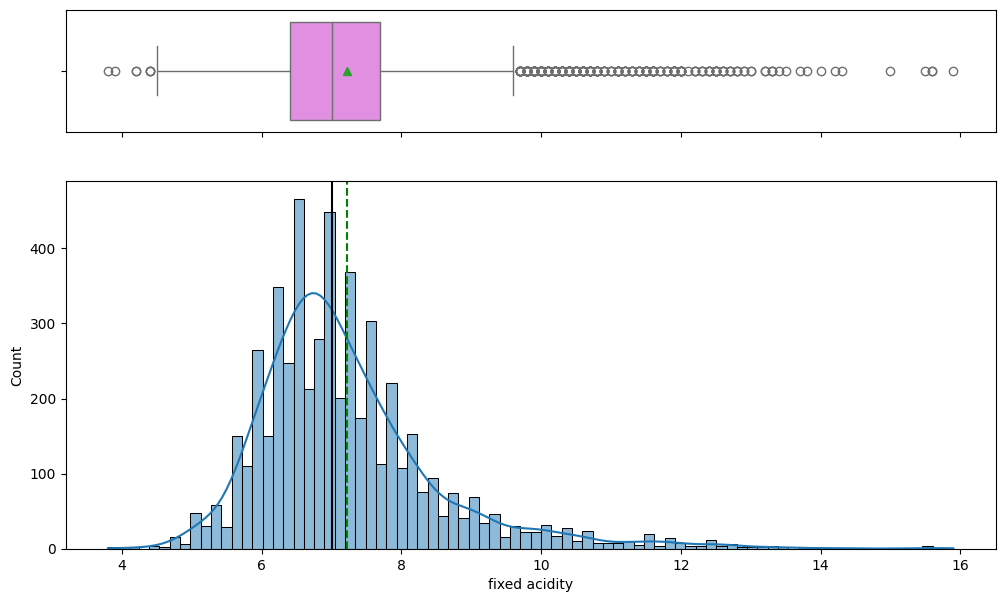

In [ ]:
histogram_boxplot(df, 'fixed acidity', kde = True)

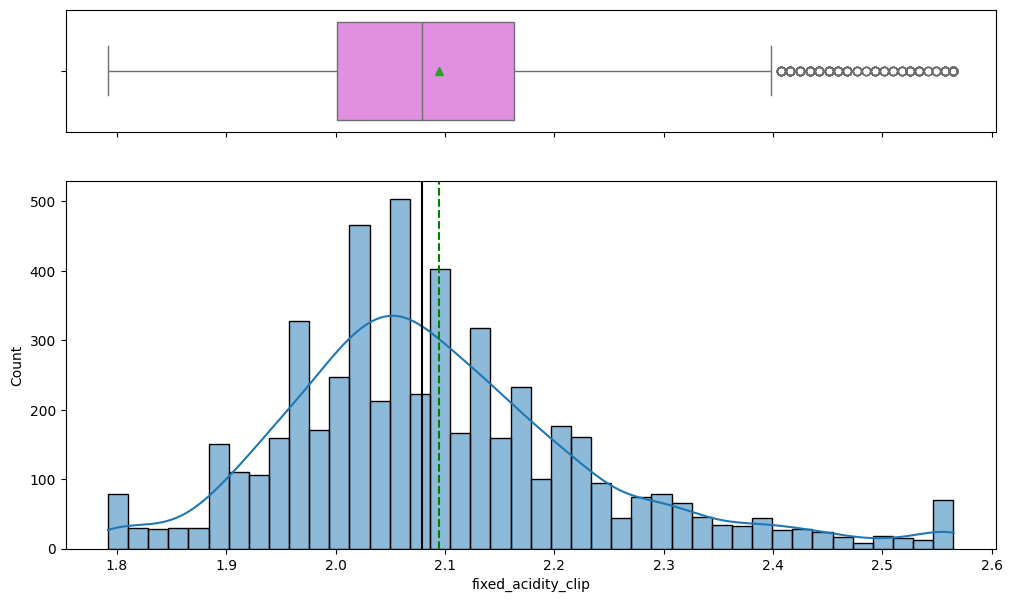

In [ ]:
df['fixed_acidity_log'] = np.log1p(df['fixed acidity'])
q_low, q_high = df['fixed_acidity_log'].quantile([0.01, 0.99])
df['fixed_acidity_clip'] = df['fixed_acidity_log'].clip(q_low, q_high)
histogram_boxplot(df, 'fixed_acidity_clip', kde = True)

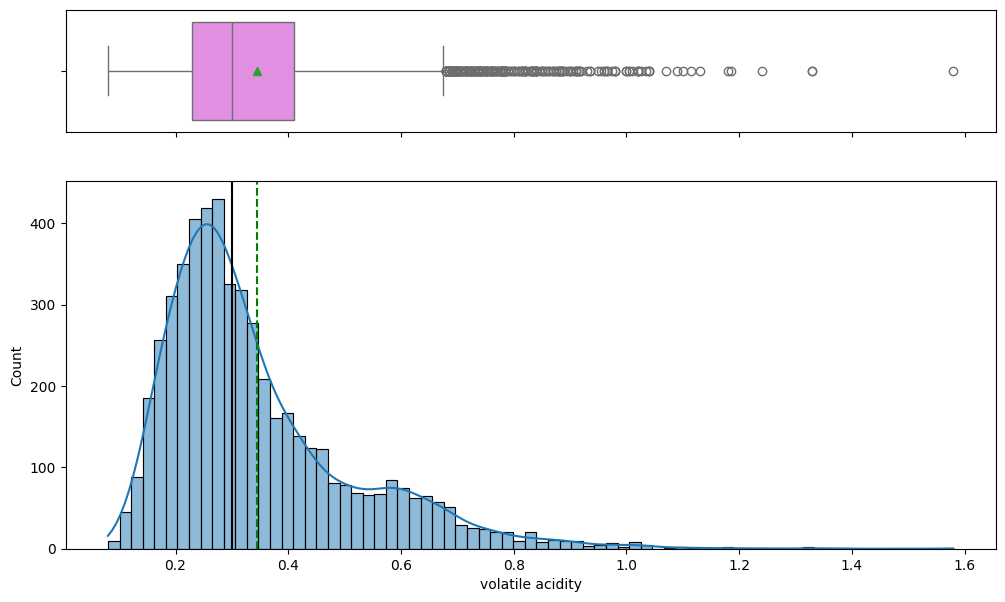

In [ ]:
histogram_boxplot(df, 'volatile acidity', kde = True)

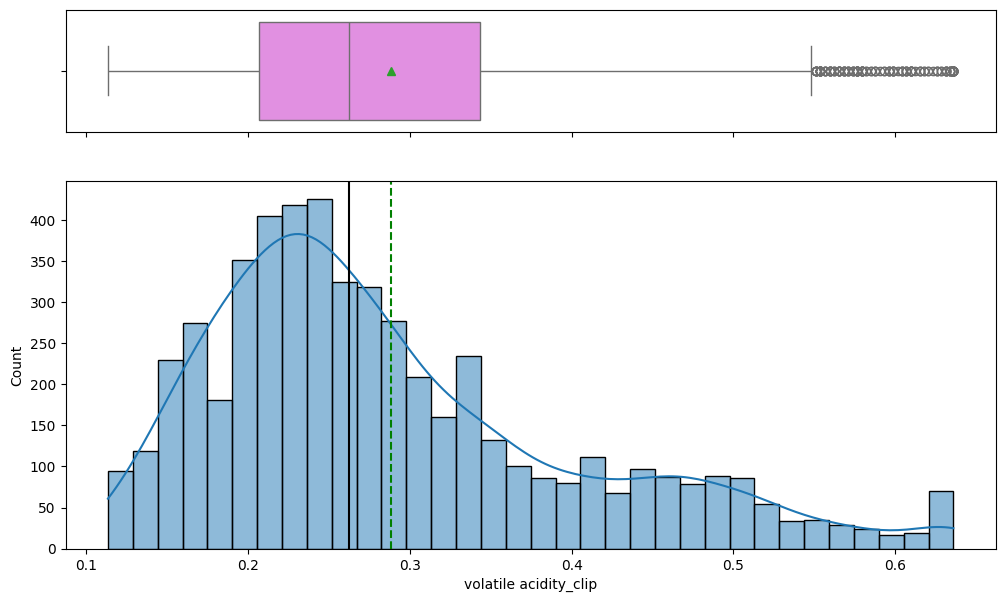

In [ ]:
df['volatile acidity_log'] = np.log1p(df['volatile acidity'])
q_low, q_high = df['volatile acidity_log'].quantile([0.01, 0.99])
df['volatile acidity_clip'] = df['volatile acidity_log'].clip(q_low, q_high)
histogram_boxplot(df, 'volatile acidity_clip', kde = True)

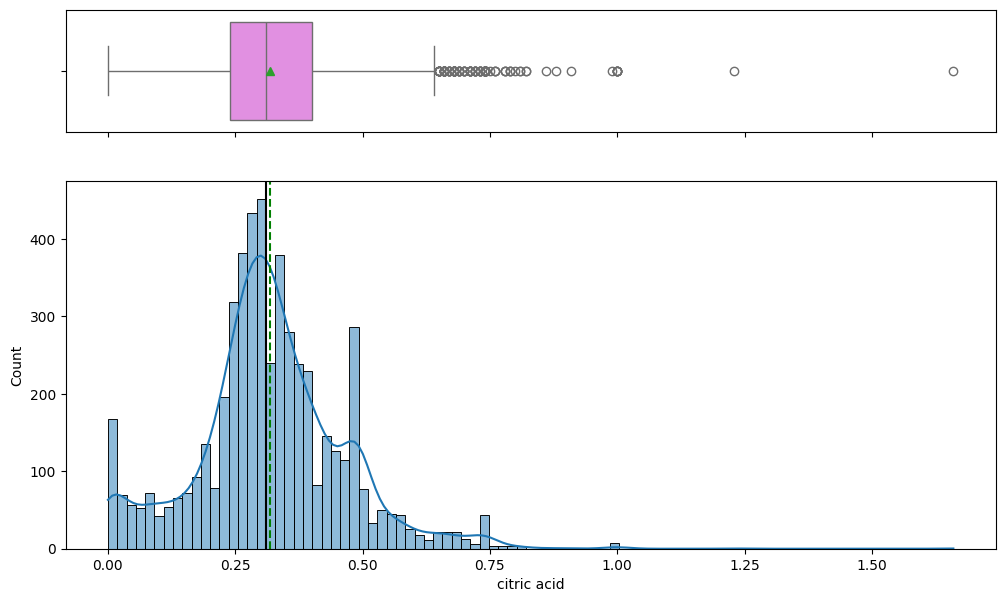

In [ ]:
histogram_boxplot(df, 'citric acid', kde = True)

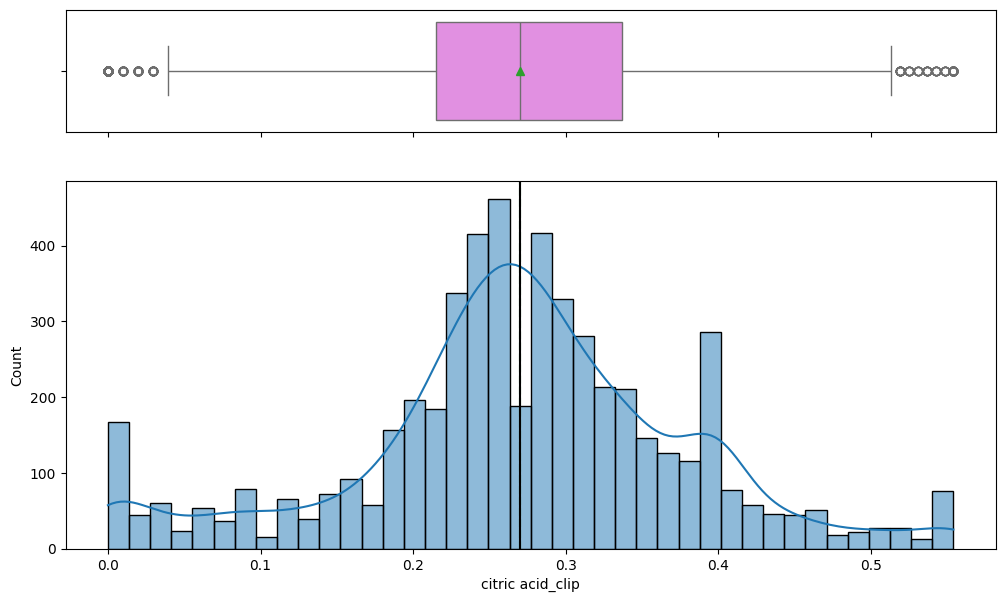

In [ ]:
df['citric acid_log'] = np.log1p(df['citric acid'])
q_low, q_high = df['citric acid_log'].quantile([0.01, 0.99])
df['citric acid_clip'] = df['citric acid_log'].clip(q_low, q_high)
histogram_boxplot(df, 'citric acid_clip', kde = True)

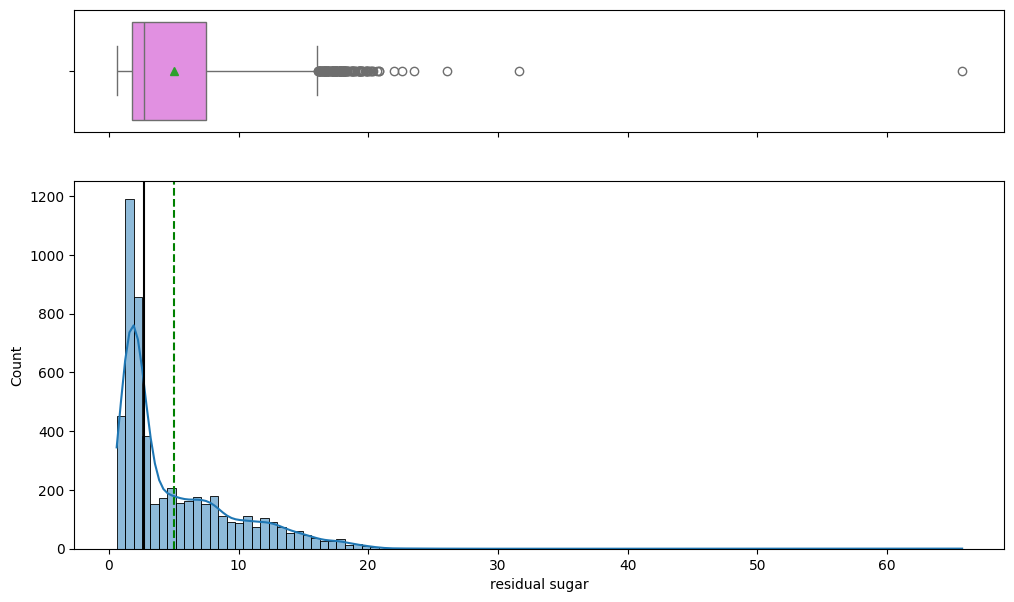

In [ ]:
histogram_boxplot(df, 'residual sugar', kde = True)

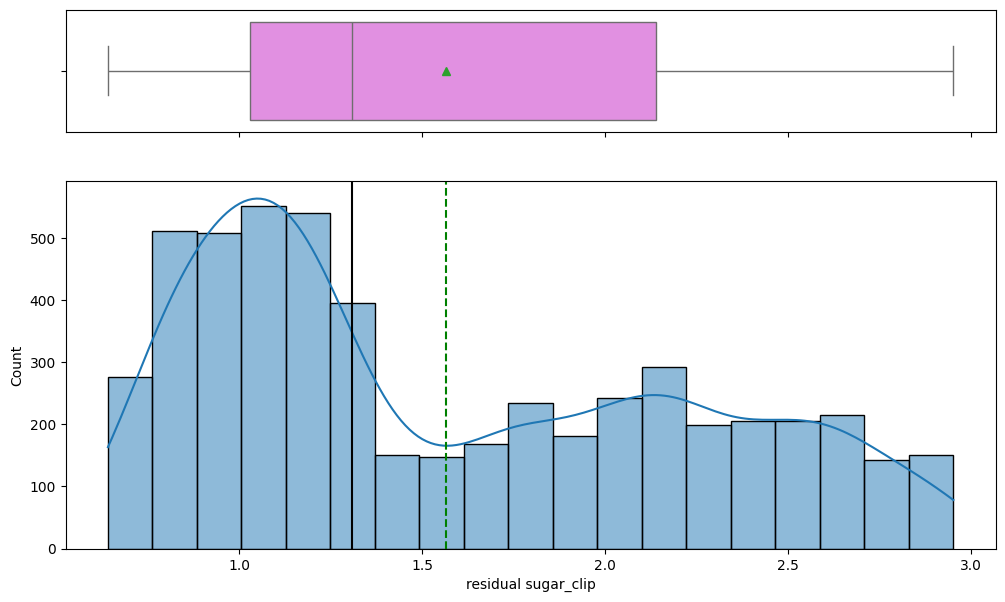

In [ ]:
df['residual sugar_log'] = np.log1p(df['residual sugar'])
q_low, q_high = df['residual sugar_log'].quantile([0.01, 0.99])
df['residual sugar_clip'] = df['residual sugar_log'].clip(q_low, q_high)
histogram_boxplot(df, 'residual sugar_clip', kde = True)

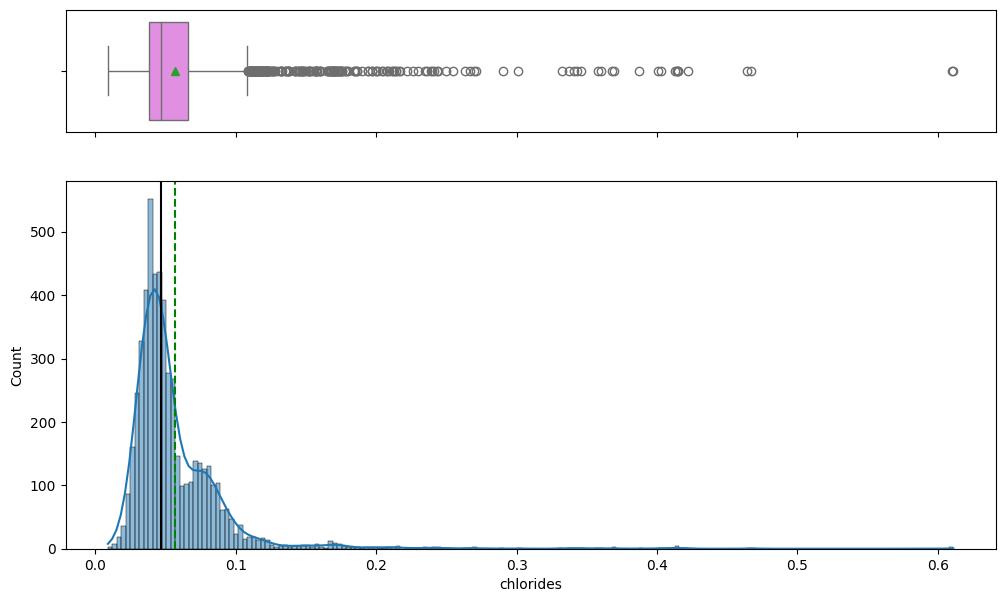

In [ ]:
histogram_boxplot(df, 'chlorides', kde = True)

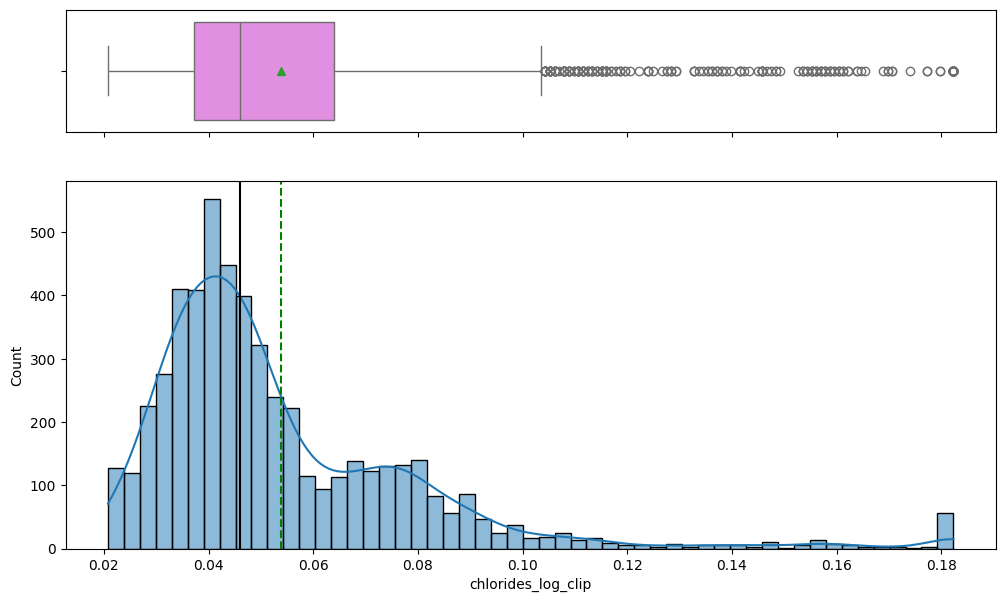

In [ ]:
df['chlorides_log'] = np.log1p(df['chlorides'])
q_low, q_high = df['chlorides_log'].quantile([0.01, 0.99])
df['chlorides_log_clip'] = df['chlorides_log'].clip(lower=q_low, upper=q_high)
histogram_boxplot(df, 'chlorides_log_clip', kde=True)


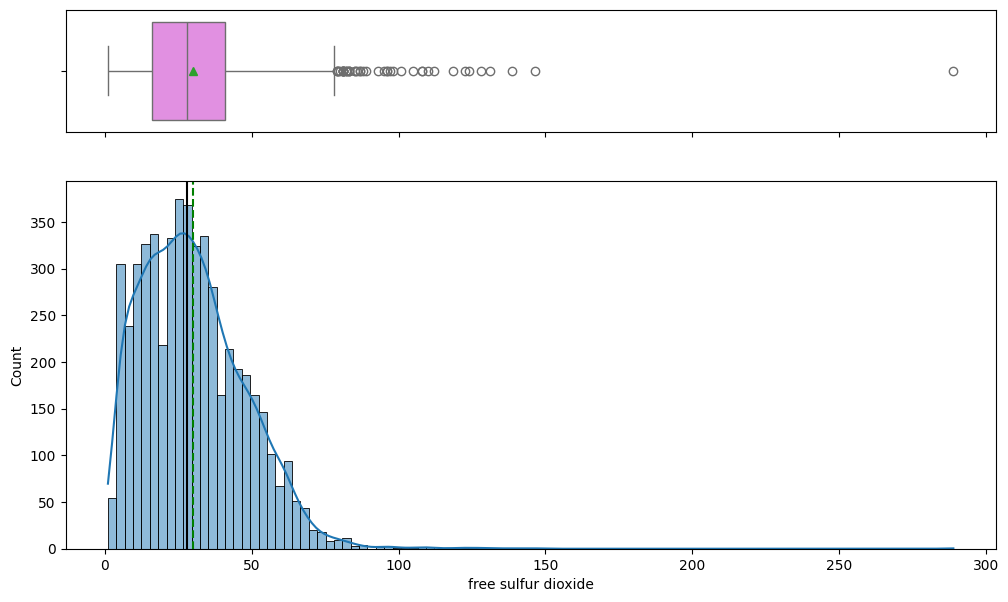

In [ ]:
histogram_boxplot(df, 'free sulfur dioxide', kde = True)

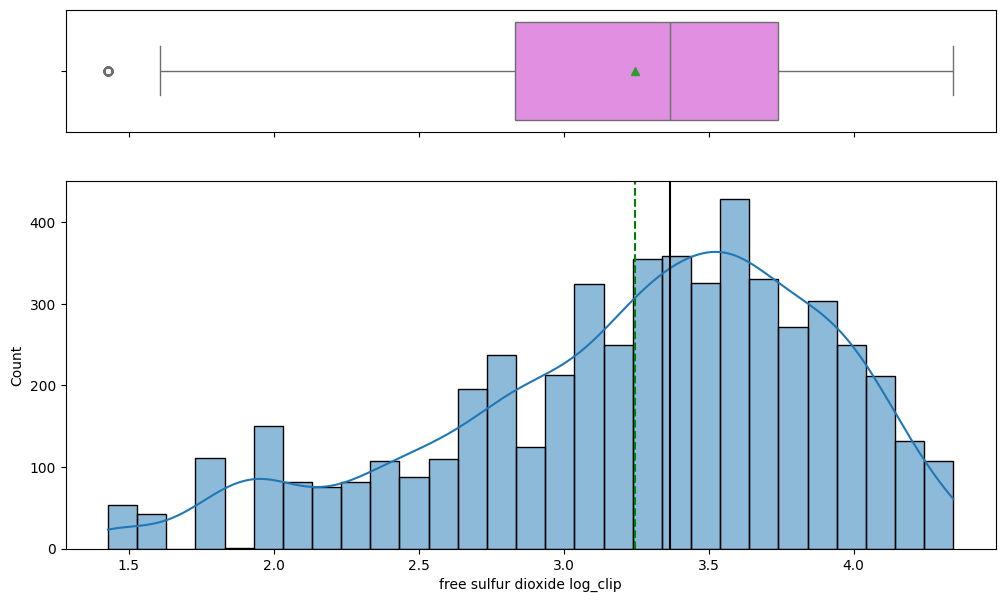

In [ ]:
df['free sulfur dioxide log'] = np.log1p(df['free sulfur dioxide'])
q_low, q_high = df['free sulfur dioxide log'].quantile([0.01, 0.99])
df['free sulfur dioxide log_clip'] = df['free sulfur dioxide log'].clip(lower=q_low, upper=q_high)
histogram_boxplot(df, 'free sulfur dioxide log_clip', kde=True)

In [ ]:
clip_frac = (df['free sulfur dioxide log'] != df['free sulfur dioxide log_clip']).mean()
print(f"{clip_frac:.2%} of rows were actually clipped")


1.99% of rows were actually clipped


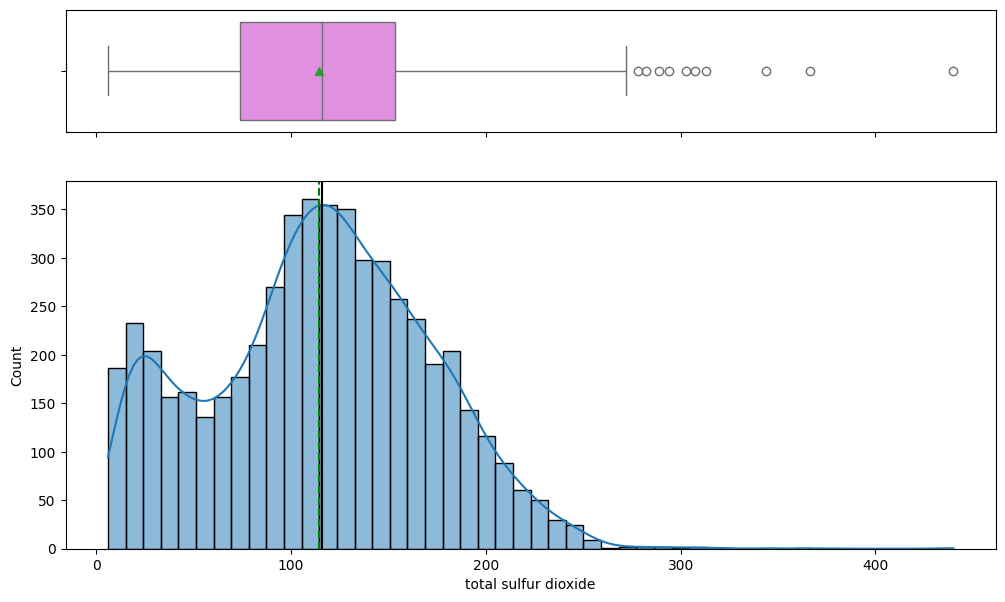

In [ ]:
histogram_boxplot(df, 'total sulfur dioxide', kde = True)

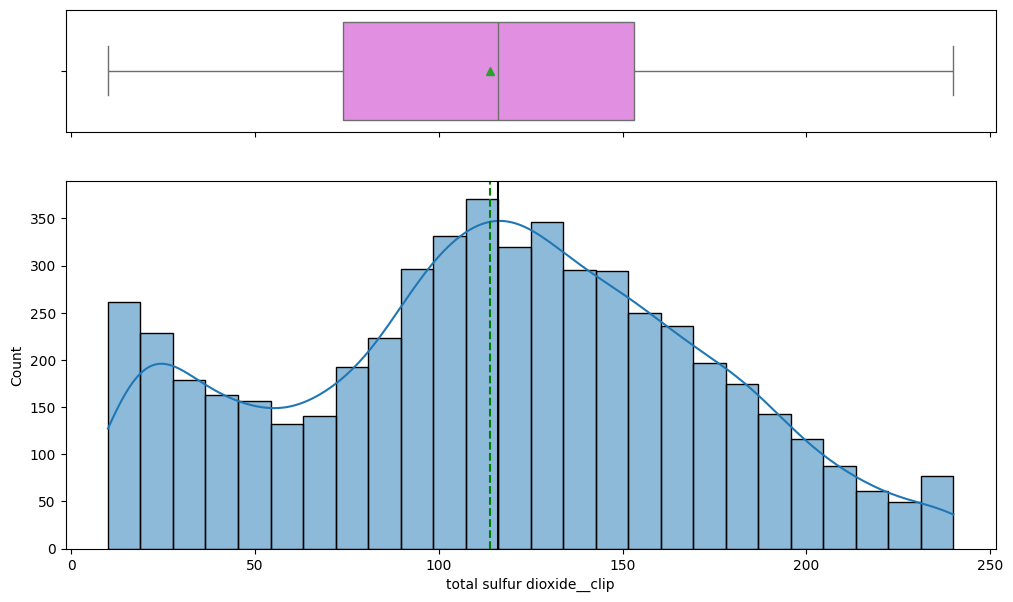

In [ ]:
df['total sulfur dioxide log'] = np.log1p(df['total sulfur dioxide'])

q_low, q_high = df['total sulfur dioxide'].quantile([0.01, 0.99])
df['total sulfur dioxide__clip'] = df['total sulfur dioxide'].clip(q_low, q_high)
histogram_boxplot(df, 'total sulfur dioxide__clip', kde = True)

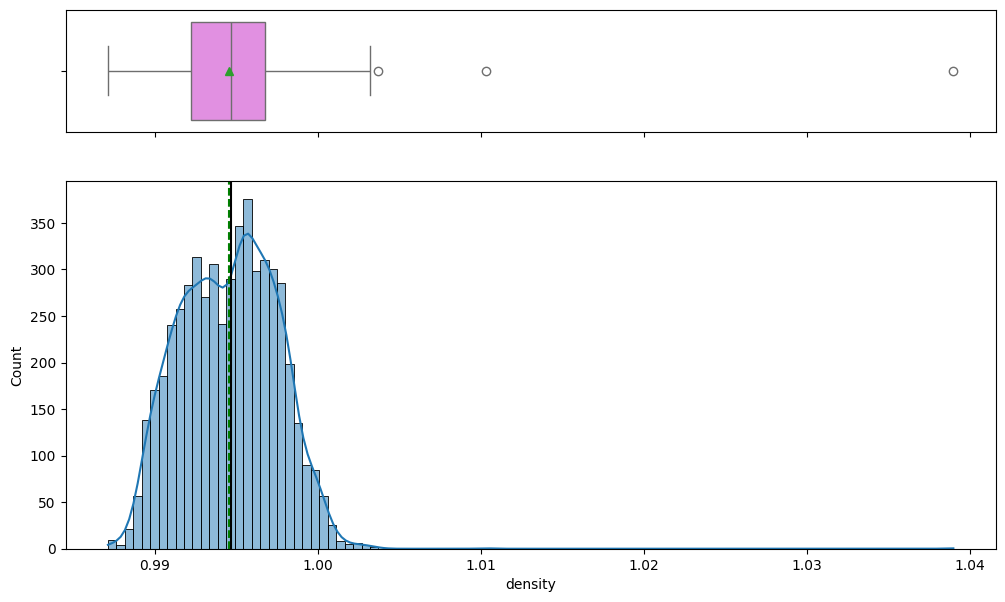

In [ ]:
histogram_boxplot(df, 'density', kde = True)

In [ ]:
# Calculate IQR
Q1 = df['density'].quantile(0.25)
Q3 = df['density'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the outliers
df['density_clipped'] = df['density'].clip(lower=lower_bound, upper=upper_bound)
print("Clipped low values:", (df['density'] < lower_bound).sum())
print("Clipped high values:", (df['density'] > upper_bound).sum())



Clipped low values: 0
Clipped high values: 3


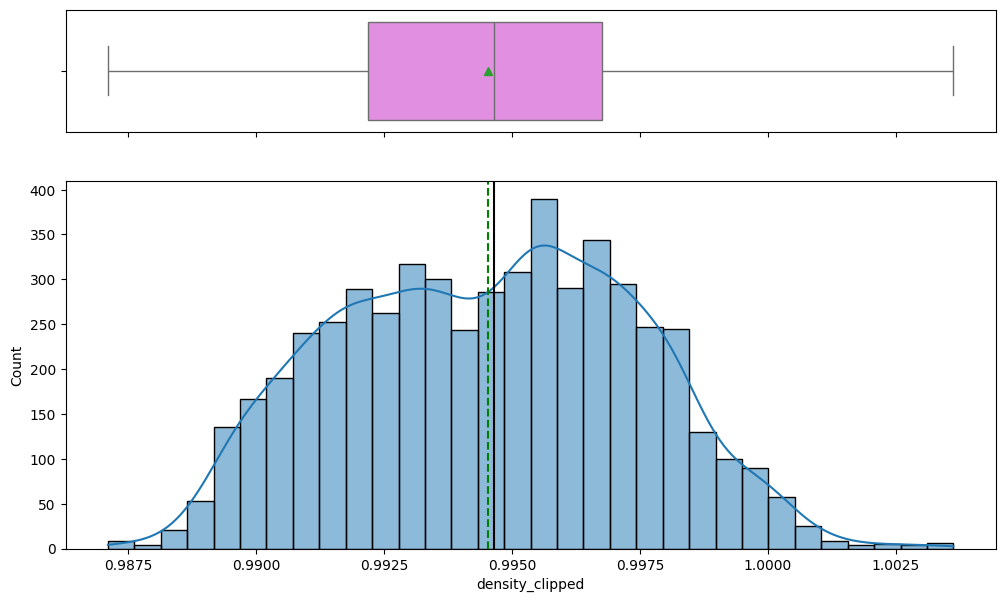

In [ ]:
histogram_boxplot(df, 'density_clipped', kde = True)

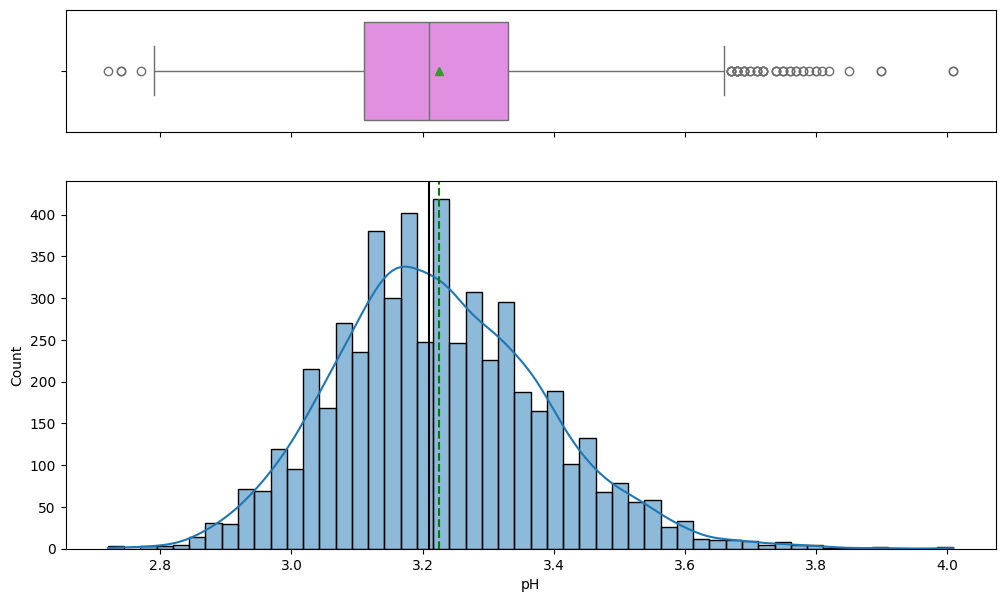

In [ ]:
histogram_boxplot(df, 'pH', kde = True)

Clipped low values: 4
Clipped high values: 45


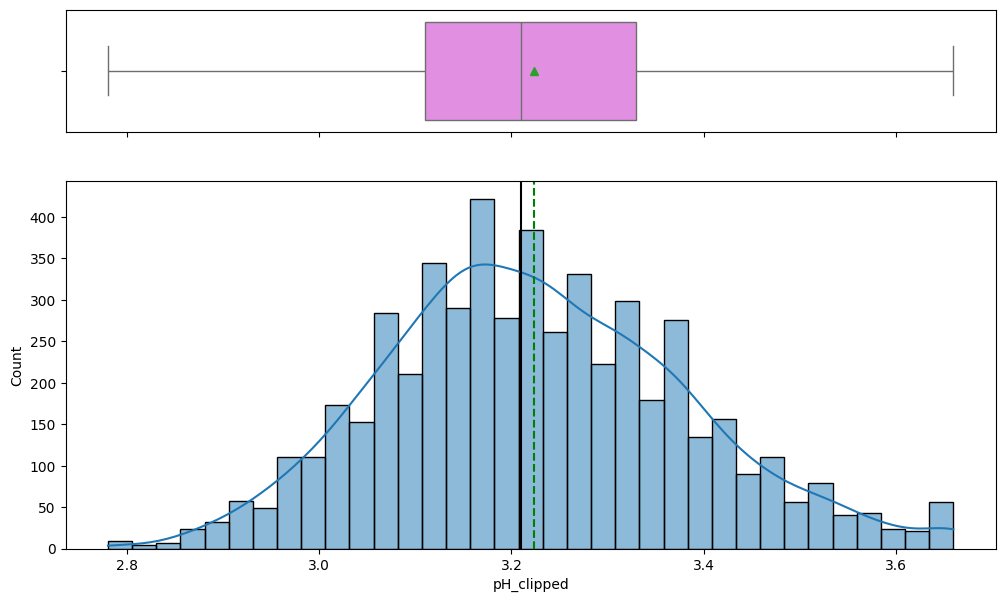

In [ ]:
# Calculate IQR for pH
Q1 = df['pH'].quantile(0.25)
Q3 = df['pH'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for pH
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip based on pH thresholds
df['pH_clipped'] = df['pH'].clip(lower=lower_bound, upper=upper_bound)
print("Clipped low values:", (df['pH'] < lower_bound).sum())
print("Clipped high values:", (df['pH'] > upper_bound).sum())

histogram_boxplot(df, 'pH_clipped', kde = True)

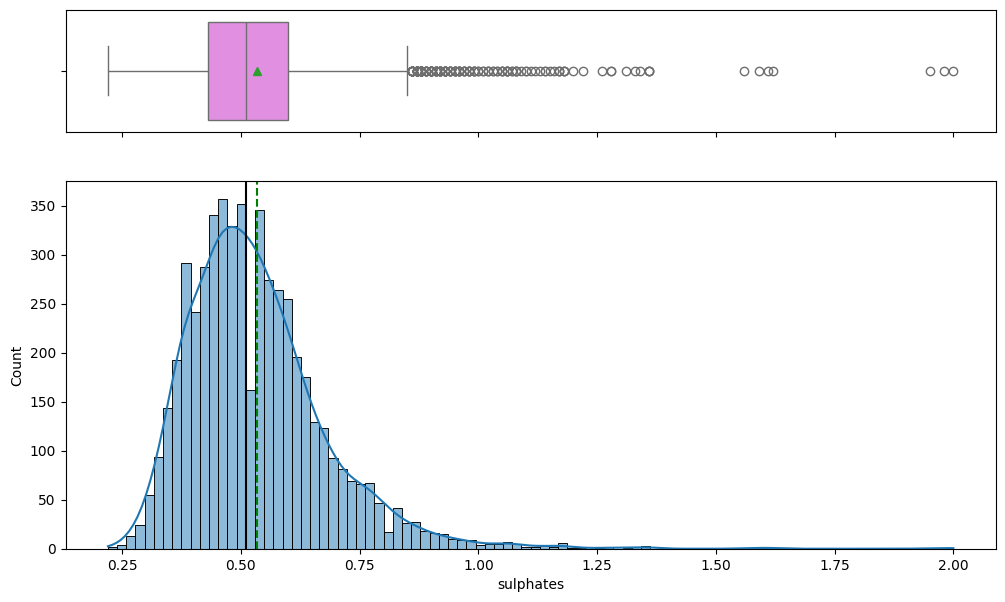

In [ ]:
histogram_boxplot(df, 'sulphates', kde = True)

Clipped low values: 0
Clipped high values: 118


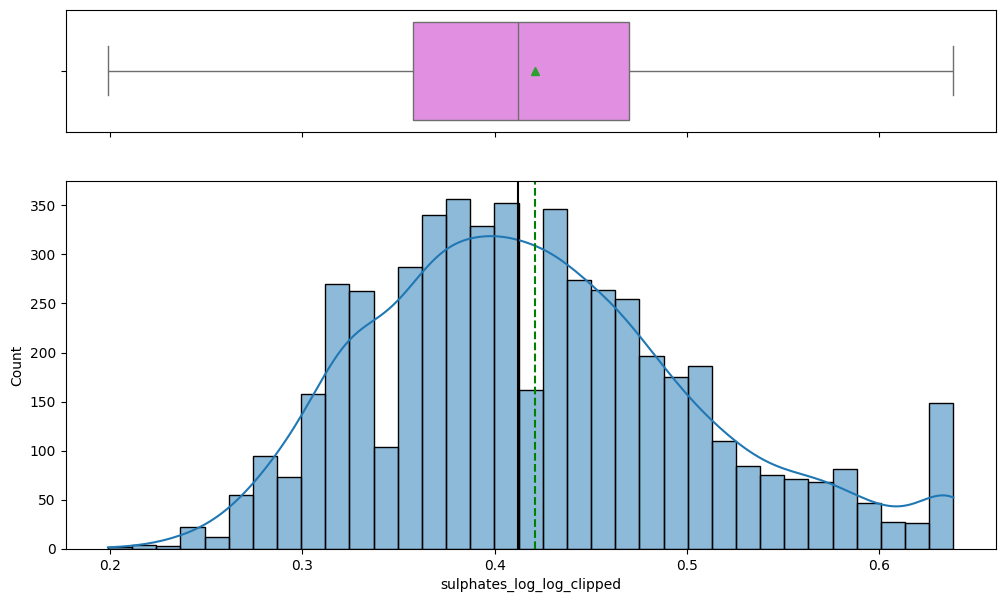

In [ ]:
df['sulphates_log'] = np.log1p(df['sulphates'])
Q1 = df['sulphates_log'].quantile(0.25)
Q3 = df['sulphates_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['sulphates_log_log_clipped'] = df['sulphates_log'].clip(lower=lower_bound, upper=upper_bound)
print("Clipped low values:", (df['sulphates_log'] < lower_bound).sum())
print("Clipped high values:", (df['sulphates_log'] > upper_bound).sum())

histogram_boxplot(df, 'sulphates_log_log_clipped', kde = True)


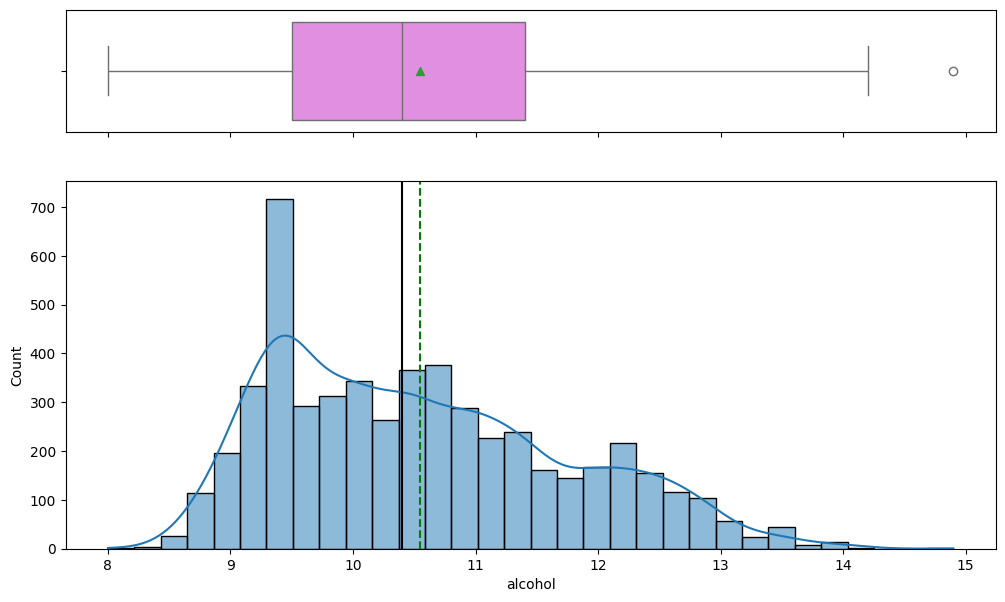

In [ ]:
histogram_boxplot(df, 'alcohol', kde = True)

Clipped low values: 0
Clipped high values: 1


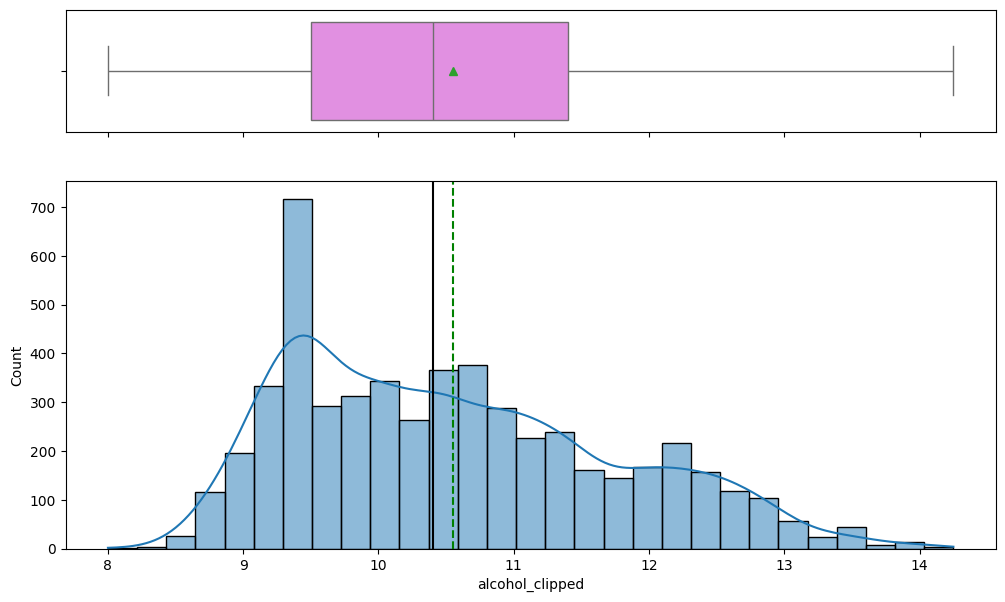

In [ ]:
Q1 = df['alcohol'].quantile(0.25)
Q3 = df['alcohol'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['alcohol_clipped'] = df['alcohol'].clip(lower=lower_bound, upper=upper_bound)
print("Clipped low values:", (df['alcohol'] < lower_bound).sum())
print("Clipped high values:", (df['alcohol'] > upper_bound).sum())

histogram_boxplot(df, 'alcohol_clipped', kde = True)


/tmp/ipython-input-23-1758563097.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


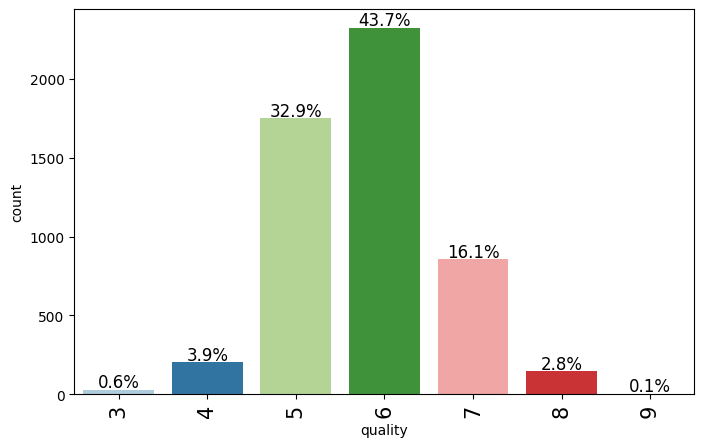

In [ ]:
labeled_barplot(df, "quality", perc = True);

/tmp/ipython-input-23-1758563097.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


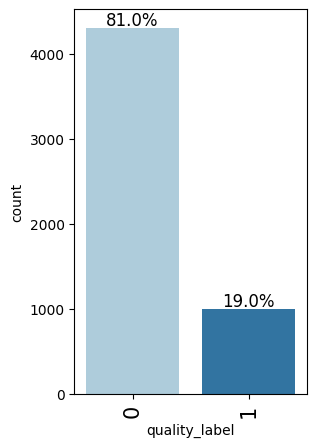

In [ ]:
labeled_barplot(df, "quality_label", perc = True);

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_label',
       'fixed_acidity_log', 'fixed_acidity_clip', 'volatile acidity_log',
       'volatile acidity_clip', 'citric acid_log', 'citric acid_clip',
       'residual sugar_log', 'residual sugar_clip', 'chlorides_log',
       'chlorides_log_clip', 'free sulfur dioxide log',
       'free sulfur dioxide log_clip', 'total sulfur dioxide log',
       'total sulfur dioxide__clip', 'density_clipped', 'pH_clipped',
       'sulphates_log', 'sulphates_log_log_clipped', 'alcohol_clipped'],
      dtype='object')

In [ ]:
raw =  ['fixed acidity', 'volatile acidity', 'citric acid',
                    'residual sugar', 'chlorides',
                    'free sulfur dioxide',
                    'total sulfur dioxide', 'density',
                    'pH', 'sulphates', 'alcohol']

In [ ]:
transformed = [
       'fixed_acidity_clip',
       'volatile acidity_clip', 'citric acid_clip',
       'residual sugar_clip',
       'chlorides_log_clip',
       'free sulfur dioxide log_clip',
     'total sulfur dioxide__clip',
       'density_clipped', 'pH_clipped',
       'sulphates_log_log_clipped', 'alcohol_clipped', 'type']

In [ ]:
rawall = ['fixed acidity', 'volatile acidity', 'citric acid',
                    'residual sugar', 'chlorides',
                    'free sulfur dioxide',
                    'total sulfur dioxide', 'density',
                    'pH', 'sulphates', 'alcohol', 'type', 'quality_label']

In [ ]:
all = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'fixed_acidity_log', 'fixed_acidity_clip', 'volatile acidity_log',
       'volatile acidity_clip', 'citric acid_log', 'citric acid_clip',
       'residual sugar_log', 'residual sugar_clip', 'chlorides_log',
       'chlorides_log_clip', 'free sulfur dioxide log',
       'free sulfur dioxide log_clip', 'total sulfur dioxide log',
       'total sulfur dioxide__clip', 'density_clipped', 'pH_clipped',
       'sulphates_log', 'sulphates_log_log_clipped', 'alcohol_clipped']

### Bivariate Distributions

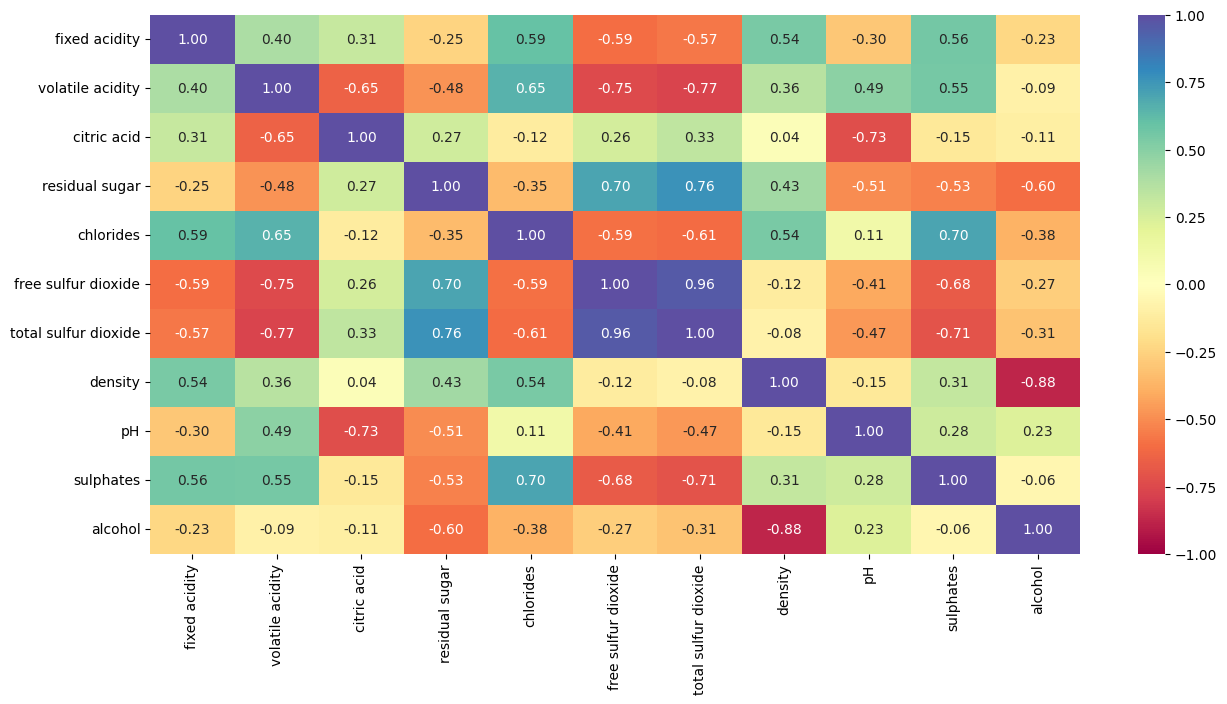

In [ ]:
corr = df[raw].corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
corr1 = corr.corr().abs()

THRESH = 0.72

# Filter only upper triangle to avoid duplicates and self-correlation
high_corr_pairs = [
    (row, col, float(corr1.loc[row, col]))
    for i, row in enumerate(corr1.columns)
    for j, col in enumerate(corr1.columns)
    if j > i and corr1.loc[row, col] > THRESH
]

# Sort by correlation strength
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: x[2], reverse=True)

high_corr_pairs

[('free sulfur dioxide', 'total sulfur dioxide', 0.957600189230953),
 ('density', 'alcohol', 0.8820114393000332),
 ('volatile acidity', 'total sulfur dioxide', 0.7669993007226809),
 ('residual sugar', 'total sulfur dioxide', 0.7629212599525893),
 ('volatile acidity', 'free sulfur dioxide', 0.7485663135779113),
 ('citric acid', 'pH', 0.732350092924964)]

###  Top Correlated Feature Pairs

Below are the most strongly correlated feature pairs in the dataset:

- **free sulfur dioxide & total sulfur dioxide** — **0.95**  
   These variables are highly correlated, likely because they represent related chemical measurements. You may consider dropping one to reduce multicollinearity in your model.

- **density & alcohol** — **0.88**  
   As alcohol content increases, density decreases. This inverse relationship aligns with chemical expectations.

- **Volatile Acidity & Total Sulfur Dioxide** —  **0.77**

   High correlation,  Sulfur dioxide acts as a preservative and may be inversely related to acidity due to stabilization effects in wine chemistry.

  Investigate whether both are needed; if one dominates in predictive power, consider dropping the other.

- **Residual Sugar & Total Sulfur Dioxide** — **0.76**
  Higher residual sugar may be preserved with higher SO₂ levels to prevent fermentation.

- **citric acid & pH** — **0.72**  
  This pair is negatively correlated (not shown explicitly here), meaning higher citric acid levels are associated with lower pH values—consistent with acid-base chemistry.


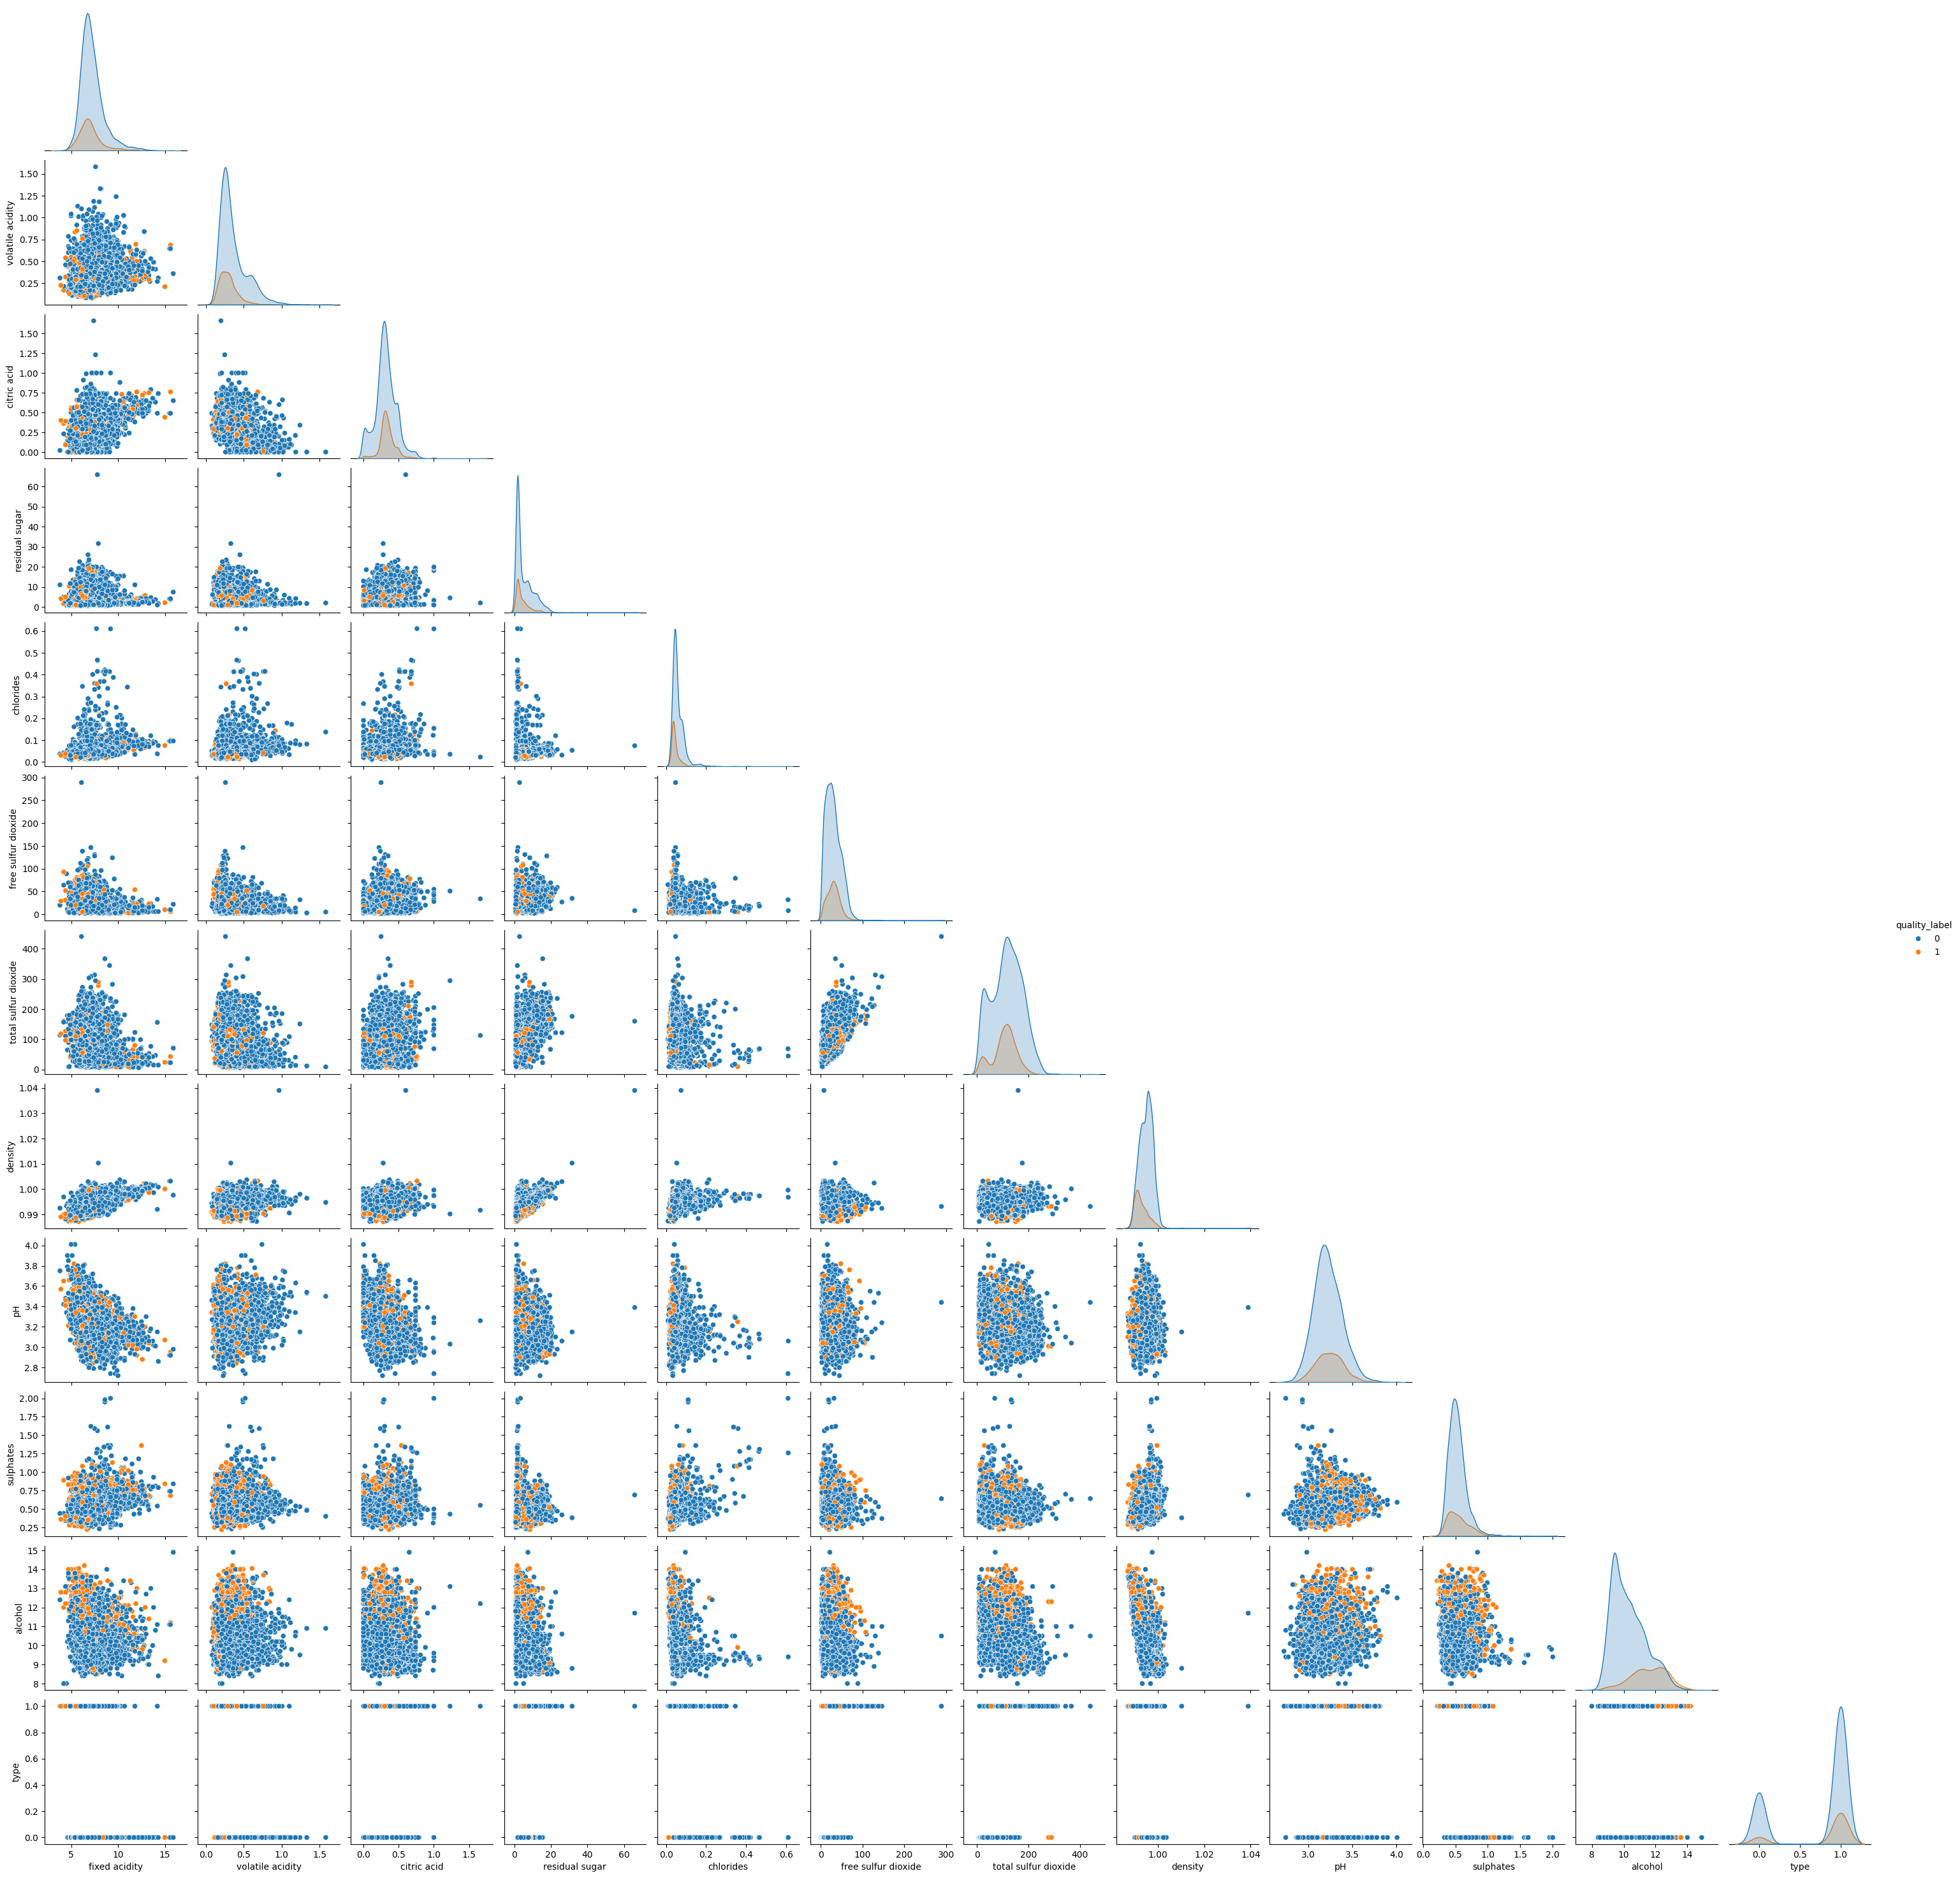

In [ ]:

sns.pairplot(df[rawall], hue='quality_label', corner=True)
plt.show()

### Data Preparation for Modeling

In [ ]:

X = df[transformed]  # drop target column
y = df['quality_label']                 # define target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4256
Number of rows in test data = 1064


In [ ]:
X_vif = X_train.copy()  # use unscaled for interpretability
X_vif = sm.add_constant(X_vif)  # add intercept

vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]

# Display VIF table
print(vif_data)

                         feature           VIF
0                          const  1.846104e+06
1             fixed_acidity_clip  4.096460e+00
2          volatile acidity_clip  2.243697e+00
3               citric acid_clip  1.710093e+00
4            residual sugar_clip  5.830937e+00
5             chlorides_log_clip  1.904299e+00
6   free sulfur dioxide log_clip  2.473746e+00
7     total sulfur dioxide__clip  4.204681e+00
8                density_clipped  1.614583e+01
9                     pH_clipped  2.190299e+00
10     sulphates_log_log_clipped  1.538851e+00
11               alcohol_clipped  5.187844e+00
12                          type  6.708062e+00


Based on the VIF analysis and the correlation matrix, several features exhibit strong multicollinearity.

Fixed acidity has a very high VIF due to its strong correlation with citric acid and pH, indicating overlapping information.

Residual sugar is highly collinear with density and total sulfur dioxide, which often co-vary in wine composition.

Free sulfur dioxide and total sulfur dioxide are naturally related and move together, making one potentially redundant.

Density strongly depends on residual sugar and alcohol, leading to inflated VIF.

pH reflects the influence of multiple acid components like fixed acidity and citric acid, explaining its high multicollinearity.

To reduce redundancy and improve model stability, it is recommended to remove or combine these high-VIF features before modeling.
- **Residual sugar** shows extreme multicollinearity, probably due to its strong connection with density and total sulfur dioxide.
- **Free sulfur dioxide** and **total sulfur dioxide** are highly collinear; they measure similar preservation effects and often track together.
- **Density** is largely determined by alcohol and residual sugar, making it redundant when these features are present.
- **pH** depends on multiple acid components, especially fixed acidity and citric acid, which leads to its high VIF value.


In [ ]:
single_auc = {}
cv = StratifiedKFold(5, shuffle=True, random_state=42)

for col in X_train.columns:                       # or a manual list
    pipe = LogisticRegression(max_iter=1000, class_weight='balanced')
    auc = cross_val_score(pipe,
                          X_train[[col]],
                          y_train,
                          cv=cv,
                          scoring='roc_auc').mean()
    single_auc[col] = auc

# Sort and inspect
for col, auc in sorted(single_auc.items(), key=lambda x: x[1], reverse=True):
    print(f"{col:<25}  AUC = {auc:.3f}")


alcohol_clipped            AUC = 0.795
density_clipped            AUC = 0.725
chlorides_log_clip         AUC = 0.687
volatile acidity_clip      AUC = 0.586
citric acid_clip           AUC = 0.559
total sulfur dioxide__clip  AUC = 0.556
type                       AUC = 0.545
fixed_acidity_clip         AUC = 0.544
pH_clipped                 AUC = 0.534
residual sugar_clip        AUC = 0.533
free sulfur dioxide log_clip  AUC = 0.518
sulphates_log_log_clipped  AUC = 0.517


In [ ]:
SEED = 42
clusters = {
    'A_acidity': ['fixed_acidity_clip', 'citric acid_clip', 'pH_clipped'],
    'B_sugar'  : ['residual sugar_clip', 'density_clipped'],
    'C_SO2'    : ['free sulfur dioxide log_clip', 'total sulfur dioxide__clip']
}

always_keep = [
    'alcohol_clipped', 'sulphates_log_log_clipped',
    'volatile acidity_clip', 'chlorides_log_clip', 'type'
]


cv   = StratifiedKFold(5, shuffle=True, random_state=SEED)
pipe = make_pipeline(StandardScaler(),
                     LogisticRegression(max_iter=1000,
                                        class_weight='balanced',
                                        solver='lbfgs'))

def auc_cv(feature):
    return cross_val_score(
        pipe, X_train[[feature]], y_train,
        cv=cv, scoring='roc_auc').mean()

chosen = []
for cname, flist in clusters.items():
    scores = {f: auc_cv(f) for f in flist}
    best   = max(scores, key=scores.get)
    chosen.append(best)
    print(f"{cname:<9}: keep **{best}**  (AUC {scores[best]:.3f})")

core_feats = always_keep + chosen
print("\nFinal feature list:", core_feats)


pipe_full = make_pipeline(StandardScaler(),
                          LogisticRegression(max_iter=1000,
                                             class_weight='balanced',
                                             solver='lbfgs'))

auc_full = cross_val_score(
    pipe_full, X_train[core_feats], y_train,
    cv=cv, scoring='roc_auc').mean()

print(f"\nCross-validated ROC-AUC (5-fold): {auc_full:.3f}")

A_acidity: keep **citric acid_clip**  (AUC 0.559)
B_sugar  : keep **density_clipped**  (AUC 0.725)
C_SO2    : keep **total sulfur dioxide__clip**  (AUC 0.556)

Final feature list: ['alcohol_clipped', 'sulphates_log_log_clipped', 'volatile acidity_clip', 'chlorides_log_clip', 'type', 'citric acid_clip', 'density_clipped', 'total sulfur dioxide__clip']

Cross-validated ROC-AUC (5-fold): 0.821


In [ ]:
predictors = ['alcohol_clipped', 'sulphates_log_log_clipped', 'volatile acidity_clip', 'chlorides_log_clip', 'type', 'citric acid_clip', 'density_clipped', 'total sulfur dioxide__clip']

X_train_const = sm.add_constant(X_train[predictors])

logit_model = sm.Logit(y_train, X_train_const).fit()
print(logit_model.summary())



Optimization terminated successfully.
         Current function value: 0.377610
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          quality_label   No. Observations:                 4256
Model:                          Logit   Df Residuals:                     4247
Method:                           MLE   Df Model:                            8
Date:                Fri, 20 Jun 2025   Pseudo R-squ.:                  0.2225
Time:                        18:31:41   Log-Likelihood:                -1607.1
converged:                       True   LL-Null:                       -2067.0
Covariance Type:            nonrobust   LLR p-value:                3.092e-193
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -60.4032     30.490     -1.981      0.048    -1

In [ ]:
core_trim = [f for f in core_feats if f not in ['type',  'citric acid_clip', 'density_clipped']]
core_trim

['alcohol_clipped',
 'sulphates_log_log_clipped',
 'volatile acidity_clip',
 'chlorides_log_clip',
 'total sulfur dioxide__clip']

In [ ]:
predictors

['alcohol_clipped',
 'sulphates_log_log_clipped',
 'volatile acidity_clip',
 'chlorides_log_clip',
 'type',
 'citric acid_clip',
 'density_clipped',
 'total sulfur dioxide__clip']

In [ ]:
def logress(
    feature_list,
    label,
    threshold=None,            # float or None → auto-optimise
    optimise_for='f1',         # 'f1', 'recall', or 'precision'
    make_plot=False
):
    """
    Train + evaluate a balanced LogisticRegression on the given features.

    Parameters
    ----------
    feature_list : list[str]
        Column names to use as predictors.
    label : str
        Friendly label for printing / tracking.
    threshold : float or None
        Decision threshold for the positive class.
        If None, the function finds the threshold that maximises `optimise_for`.
    optimise_for : {'f1', 'recall', 'precision'}
        Metric used to choose the best threshold when `threshold is None`.
    make_plot : bool
        If True, shows a Precision / Recall / F1 vs threshold plot.
    """

    pipe = make_pipeline(
        StandardScaler(),
        LogisticRegression(max_iter=1_000,
                           class_weight='balanced',
                           solver='lbfgs',
                           random_state=SEED)
    )


    auc_cv = cross_val_score(
        pipe, X_train[feature_list], y_train,
        cv=cv, scoring='roc_auc'
    ).mean()


    pipe.fit(X_train[feature_list], y_train)
    y_prob = pipe.predict_proba(X_test[feature_list])[:, 1]


    if threshold is None:
        prec, rec, thr = precision_recall_curve(y_test, y_prob, pos_label=1)
        thr = np.append(thr, 1.01)                    # align lengths
        metric_values = {
            'f1'       : 2 * prec * rec / (prec + rec + 1e-10),
            'recall'   : rec,
            'precision': prec
        }[optimise_for]
        best_idx  = metric_values.argmax()
        threshold = thr[best_idx]

    y_pred = (y_prob >= threshold).astype(int)


    res = {
        "label"       : label,
        "n_feat"      : len(feature_list),
        "AUC cv"      : auc_cv,
        "AUC test"    : roc_auc_score(y_test, y_prob),
        "ACC test"    : accuracy_score(y_test, y_pred),
        "Recall test" : recall_score(y_test, y_pred),
        "Precision test": np.mean(y_pred[y_test == 1]) \
                          if y_pred.sum() else 0,
        "F1 test"     : f1_score(y_test, y_pred),
        "threshold"   : threshold
    }


    print(f"\n{label} — {len(feature_list)} feature(s)")
    print(f"  Threshold  : {threshold:.3f}  (optimise_for = {optimise_for})")
    print(f"  CV-AUC     : {res['AUC cv']:.3f}")
    print(f"  Test AUC   : {res['AUC test']:.3f}")
    print(f"  Test ACC   : {res['ACC test']:.3f}")
    print(f"  Test Recall: {res['Recall test']:.3f}")
    print(f"  Test Prec. : {res['Precision test']:.3f}")
    print(f"  Test F1    : {res['F1 test']:.3f}")
    print(classification_report(y_test, y_pred, digits=3))


    if make_plot:
        prec, rec, thr = precision_recall_curve(y_test, y_prob, pos_label=1)
        thr = np.append(thr, 1.01)
        f1 = 2 * prec * rec / (prec + rec + 1e-10)

        plt.figure(figsize=(8, 5))
        plt.plot(thr, prec, label='Precision', lw=2)
        plt.plot(thr, rec , label='Recall'   , lw=2)
        plt.plot(thr, f1  , label='F1 score', lw=2,
                 color='forestgreen')
        plt.axvline(threshold, ls='--', c='black',
                    label=f'thr = {threshold:.2f}')
        plt.gca().invert_xaxis()
        plt.xlabel("Decision threshold")
        plt.ylabel("Score")
        plt.title(f"Precision / Recall / F1 – {label} (test set)")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()


    return res



Core-8 (all clipped) — 8 feature(s)
  Threshold  : 0.543  (optimise_for = f1)
  CV-AUC     : 0.821
  Test AUC   : 0.811
  Test ACC   : 0.749
  Test Recall: 0.743
  Test Prec. : 0.743
  Test F1    : 0.529
              precision    recall  f1-score   support

           0      0.926     0.751     0.829       862
           1      0.411     0.743     0.529       202

    accuracy                          0.749      1064
   macro avg      0.668     0.747     0.679      1064
weighted avg      0.828     0.749     0.772      1064



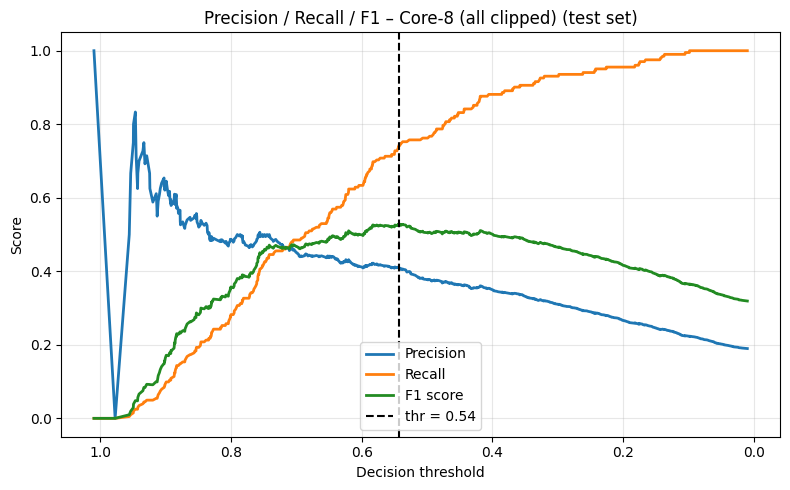


Trimmed — 5 feature(s)
  Threshold  : 0.528  (optimise_for = f1)
  CV-AUC     : 0.821
  Test AUC   : 0.807
  Test ACC   : 0.736
  Test Recall: 0.757
  Test Prec. : 0.757
  Test F1    : 0.521
              precision    recall  f1-score   support

           0      0.928     0.731     0.818       862
           1      0.397     0.757     0.521       202

    accuracy                          0.736      1064
   macro avg      0.663     0.744     0.669      1064
weighted avg      0.827     0.736     0.761      1064



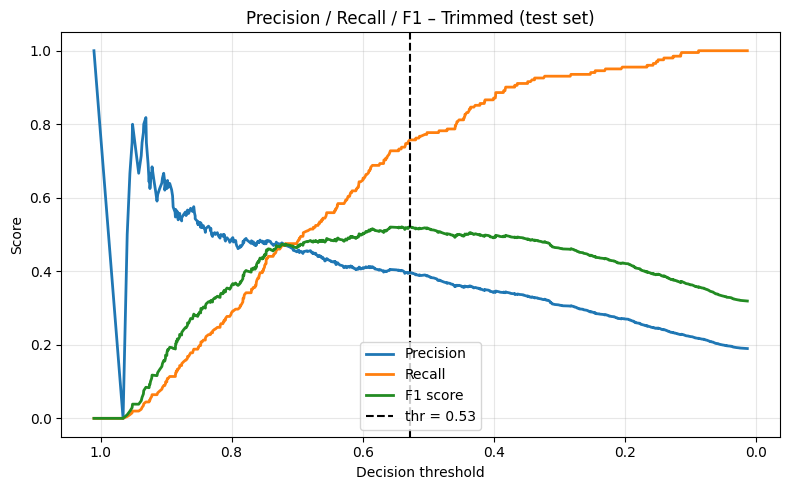

label  n_feat  AUC cv  AUC test  ACC test  Recall test  \
0  Core-8 (all clipped)       8   0.821     0.811     0.749        0.743   
1               Trimmed       5   0.821     0.807     0.736        0.757   

   Precision test  F1 test  threshold  
0           0.743    0.529      0.543  
1           0.757    0.521      0.528

In [ ]:
feature_sets = {
    "Core-8 (all clipped)":predictors,          # ← your 8-feature list
    "Trimmed":     core_trim          # ← 6 after dropping type & p>0.
}


# ------------------------------------------------------------------
results = []
for name, cols in feature_sets.items():
    out = logress(cols, name, make_plot=True)   # the function we defined earlier
    results.append(out)

results_df = (pd.DataFrame(results)
                .sort_values("AUC test", ascending=False)
                .reset_index(drop=True))

display(results_df.round(3))

In [ ]:



X = df[all]  # drop target column
y = df['quality_label']                 # define target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
SEED = 42                            # reproducibility
cv    = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)


feature_sets = {
    "Core-8 (all clipped)": predictors,   # 8 features
    "Trimmed":              core_trim ,  # 5 features
    "Raw":                  raw
}

kernel_param_grids = {
    "linear":  { "C": [0.1, 1, 10] },
    "rbf":     { "C": [0.1, 1, 10], "gamma": ["scale", 0.1, 0.01] },
    "poly":    { "C": [0.1, 1],     "gamma": ["scale", 0.1], "degree": [2, 3] },
    "sigmoid": { "C": [0.1, 1, 10], "gamma": ["scale", 0.1] }
}

def svm_kernel_search(feats, label, kernel, param_grid):
    pipe = make_pipeline(
        StandardScaler(),
        SVC(kernel=kernel, probability=True,
            class_weight="balanced", random_state=SEED)
    )
    # prefix grid keys with pipeline step name ("svc__")
    grid = {f"svc__{k}": v for k, v in param_grid.items()}

    search = GridSearchCV(
        pipe, grid,
        scoring="roc_auc",
        cv=cv, n_jobs=-1, verbose=0
    )
    search.fit(X_train[feats], y_train)

    best_model = search.best_estimator_
    y_prob = best_model.predict_proba(X_test[feats])[:, 1]
    y_pred = best_model.predict(X_test[feats])

    res = {
        "label"        : f"{label} | {kernel}",
        "n_feat"       : len(feats),
        "best_params"  : search.best_params_,
        "AUC_cv"       : search.best_score_,
        "AUC_test"     : roc_auc_score(y_test, y_prob),
        "ACC_test"     : accuracy_score (y_test, y_pred),
        "Recall_test"  : recall_score   (y_test, y_pred),
        "Precision_test": precision_score(y_test, y_pred),
        "F1_test"      : f1_score       (y_test, y_pred),
        "threshold"    : 0.5,                       # default for SVC

    }

    # Optional console summary
    print(f"\n{res['label']}  (best CV AUC = {res['AUC_cv']:.3f})")
    print("Best params:", search.best_params_)
    print(f"Test AUC   : {res['AUC_test']:.3f}")
    print(classification_report(y_test, y_pred, digits=3))

    return res

results = []
for set_name, feats in feature_sets.items():
    for ker, grid in kernel_param_grids.items():
        results.append(svm_kernel_search(feats, set_name, ker, grid))


results_df = (pd.DataFrame(results)
                .sort_values("AUC_test", ascending=False)
                .reset_index(drop=True))

display(
    results_df[["label", "n_feat", "AUC_cv", "AUC_test",
                "ACC_test", "Recall_test", "Precision_test",
                "F1_test", "best_params"]]
      .round(3)
)



Core-8 (all clipped) | linear  (best CV AUC = 0.820)
Best params: {'svc__C': 10}
Test AUC   : 0.808
              precision    recall  f1-score   support

           0      0.940     0.686     0.793       862
           1      0.377     0.812     0.515       202

    accuracy                          0.710      1064
   macro avg      0.658     0.749     0.654      1064
weighted avg      0.833     0.710     0.740      1064


Core-8 (all clipped) | rbf  (best CV AUC = 0.826)
Best params: {'svc__C': 1, 'svc__gamma': 0.1}
Test AUC   : 0.826
              precision    recall  f1-score   support

           0      0.942     0.696     0.801       862
           1      0.386     0.817     0.525       202

    accuracy                          0.719      1064
   macro avg      0.664     0.756     0.663      1064
weighted avg      0.836     0.719     0.748      1064


Core-8 (all clipped) | poly  (best CV AUC = 0.815)
Best params: {'svc__C': 1, 'svc__degree': 3, 'svc__gamma': 0.1}
Test AUC   : 

label  n_feat  AUC_cv  AUC_test  ACC_test  \
0                        Raw | rbf      11   0.843     0.853     0.736   
1       Core-8 (all clipped) | rbf       8   0.826     0.826     0.719   
2                       Raw | poly      11   0.817     0.825     0.748   
3                    Trimmed | rbf       5   0.828     0.822     0.711   
4                     Raw | linear      11   0.831     0.814     0.724   
5                   Trimmed | poly       5   0.817     0.810     0.773   
6    Core-8 (all clipped) | linear       8   0.820     0.808     0.710   
7                 Trimmed | linear       5   0.821     0.806     0.701   
8      Core-8 (all clipped) | poly       8   0.815     0.805     0.764   
9                Trimmed | sigmoid       5   0.810     0.786     0.706   
10                   Raw | sigmoid      11   0.763     0.729     0.675   
11  Core-8 (all clipped) | sigmoid       8   0.776     0.722     0.657   

    Recall_test  Precision_test  F1_test  \
0         0.827           0.404    0.543   
1         0.817           0.386    0.525   
2         0.757           0.411    0.533   
3         0.817           0.378    0.517   
4         0.832           0.393    0.533   
5         0.634           0.432    0.514   
6         0.812           0.377    0.515   
7         0.787           0.366    0.500   
8         0.678           0.424    0.522   
9         0.767           0.368    0.498   
10        0.708           0.333    0.453   
11        0.693           0.316    0.434   

                                          best_params  
0                {'svc__C': 1, 'svc__gamma': 'scale'}  
1                    {'svc__C': 1, 'svc__gamma': 0.1}  
2   {'svc__C': 1, 'svc__degree': 3, 'svc__gamma': ...  
3                    {'svc__C': 1, 'svc__gamma': 0.1}  
4                                     {'svc__C': 0.1}  
5   {'svc__C': 0.1, 'svc__degree': 3, 'svc__gamma'...  
6                                      {'svc__C': 10}  
7                                      {'svc__C': 10}  
8   {'svc__C': 1, 'svc__degree': 3, 'svc__gamma': ...  
9                  {'svc__C': 0.1, 'svc__gamma': 0.1}  
10             {'svc__C': 0.1, 'svc__gamma': 'scale'}  
11                 {'svc__C': 0.1, 'svc__gamma': 0.1}

In [ ]:

SEED = 42

TARGET = 'quality_label'


X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y
)

# -----------------------------------------------------------
# 2.  Split temp (80%) into 75-25 → train (60%) & val (20%)
# -----------------------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

# -----------------------------------------------------------
# 3.  Show shapes
# -----------------------------------------------------------
print("Train :", X_train.shape)
print("Val   :", X_val.shape)
print("Test  :", X_test.shape)


# ---------------------------------------------------------------
# 1.  Model list
# ---------------------------------------------------------------
models = []

# tree / boosting models (no scaling needed)
models += [
    ("Bagging",        BaggingClassifier(random_state=SEED)),
    ("RandomForest",   RandomForestClassifier(random_state=SEED,
                                              class_weight='balanced')),
    ("GBM",            GradientBoostingClassifier(random_state=SEED)),
    ("AdaBoost",       AdaBoostClassifier(random_state=SEED)),
    ("DecisionTree",   DecisionTreeClassifier(random_state=SEED,
                                              class_weight='balanced')),
    ("XGBoost",        XGBClassifier(random_state=SEED,
                                     eval_metric='logloss',
                                     scale_pos_weight=
                                     (y_train==0).sum()/(y_train==1).sum()))
]

# ---------------------------------------------------------------
# 2.  Train + evaluate
# ---------------------------------------------------------------
rows = []

for name, model in models:
    model.fit(X_train, y_train)

    # ---------- predictions ----------
    y_hat_tr = model.predict(X_train)
    y_hat_va = model.predict(X_val)

    # ---------- recall ----------
    rec_tr = recall_score(y_train, y_hat_tr, pos_label=1)
    rec_va = recall_score(y_val,   y_hat_va, pos_label=1)

    # ---------- precision ----------
    prec_tr = precision_score(y_train, y_hat_tr, pos_label=1)
    prec_va = precision_score(y_val,   y_hat_va, pos_label=1)


    f1_tr   = f1_score(y_train, y_hat_tr,      pos_label=1)
    f1_va   = f1_score(y_val,   y_hat_va,      pos_label=1)

    # ---------- store ----------
    rows.append({
        'model': name,
        'rec_train': rec_tr,
        'rec_val':   rec_va,
        'prec_train': prec_tr,
        'prec_val':   prec_va,
        'rec_gap_val':  rec_tr - rec_va,
        'prec_gap_val': prec_tr - prec_va,
        "f1_train"  : f1_tr,
        "f1_val"    : f1_va,
        "f1_gap"    : f1_tr   - f1_va
    })

# ❷ turn list → DataFrame
metrics_df = pd.DataFrame(rows)

# optionally sort by validation recall
metrics_df = metrics_df.sort_values('rec_val', ascending=False).reset_index(drop=True)

# pretty print
display(metrics_df.style.format({'train_recall':"{:.3f}",
                                 'val_recall':"{:.3f}",
                                 'diff':"{:+.3f}"}))


Train : (3192, 31)
Val   : (1064, 31)
Test  : (1064, 31)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Model = XGBClassifier(random_state=1, eval_metric='logloss')

param_dist = {                # rename for clarity
    'n_estimators': np.arange(50, 300, 50),
    'scale_pos_weight': [1, 2, 5, 10],     # 0 is meaningless
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [0, 1, 3, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

scorer = metrics.make_scorer(metrics.recall_score, pos_label=1)

random_search = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_dist,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1
)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best CV recall :", random_search.best_score_)

Best parameters: {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': np.int64(200), 'learning_rate': 0.01, 'gamma': 3}
Best CV recall : 0.8561983471074379


In [ ]:
xgb_tuned = random_search.best_estimator_

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(200), n_jobs=None, num_parallel_tree=None,
              random_state=1, ...)

In [ ]:
xgb_tuned2 = model_performance_classification_sklearn(
    xgb_tuned, X_val, y_val)
xgb_tuned2

Accuracy    Recall  Precision        F1
0  0.691729  0.831683   0.363636  0.506024

In [ ]:
xgb_tunedtest = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tunedtest

Accuracy    Recall  Precision        F1
0  0.701128  0.851485   0.373913  0.519637

In [ ]:
from sklearn.inspection import permutation_importance



⮩  Native (gain) importances:



gain
alcohol                     0.281882
type                        0.115084
volatile acidity            0.091373
density                     0.053226
citric acid                 0.052839
total sulfur dioxide        0.052345
sulphates                   0.052263
pH                          0.047716
fixed acidity               0.046499
total sulfur dioxide__clip  0.043758


⮩  Permutation importances (mean ΔAUC):



perm_mean
alcohol                0.075822
pH                     0.004770
sulphates              0.003618
residual sugar         0.003266
residual sugar_clip    0.000305
fixed_acidity_log      0.000000
type                   0.000000
volatile acidity_log   0.000000
chlorides_log_clip     0.000000
chlorides_log          0.000000

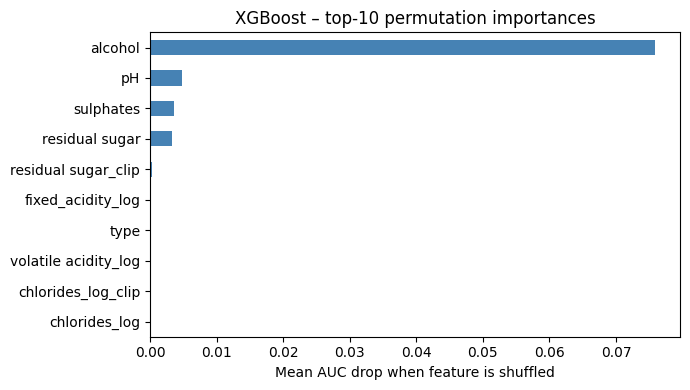

In [ ]:


if hasattr(xgb_tuned, "feature_importances_"):          # plain estimator
    xgb_clf = xgb_tuned
else:                                                   # pipeline
    xgb_clf = xgb_tuned.named_steps[
        [k for k in xgb_tuned.named_steps][-1]          # take last step
    ]

# ─────────────────────────────────────────────────────────
# 2.  GAIN-based importance that XGBoost stores internally
# ─────────────────────────────────────────────────────────
gain_imp = pd.Series(
    xgb_clf.feature_importances_,           # 1-D array
    index = X_train.columns                 # same order as the training data
).sort_values(ascending=False)

print("\n⮩  Native (gain) importances:\n")
display(gain_imp.to_frame("gain").head(10))   # top-10

# ─────────────────────────────────────────────────────────
# 3.  (Optional) permutation importance – model-agnostic &
#     always computed on a HOLD-OUT set (safer!)
# ─────────────────────────────────────────────────────────
perm = permutation_importance(
    xgb_tuned,                        # the full pipeline works here
    X_test, y_test,
    n_repeats = 40,
    random_state = 42,
    n_jobs = -1
)

perm_imp = pd.Series(
    perm.importances_mean,
    index = X_test.columns
).sort_values(ascending=False)

print("\n⮩  Permutation importances (mean ΔAUC):\n")
display(perm_imp.to_frame("perm_mean").head(10))

# ─────────────────────────────────────────────────────────
# 4.  Quick bar-plot of the permutation importances
# ─────────────────────────────────────────────────────────
plt.figure(figsize=(7, 4))
perm_imp.head(10).iloc[::-1].plot(kind="barh", color="steelblue")
plt.title("XGBoost – top-10 permutation importances")
plt.xlabel("Mean AUC drop when feature is shuffled")
plt.tight_layout()
plt.show()


In [ ]:
new_feats = ['alcohol', 'sulphates', 'pH', 'residual sugar']


In [ ]:
Xnew = df[new_feats]
ynew = df['quality_label']

X_traint, X_testt, y_traint, y_testt = train_test_split(
    Xnew, ynew, test_size=0.2, stratify=y, random_state=SEED)

In [ ]:
Model = XGBClassifier(random_state=1, eval_metric='logloss')

param_dist = {                # rename for clarity
    'n_estimators': np.arange(50, 300, 50),
    'scale_pos_weight': [1, 2, 5, 10],     # 0 is meaningless
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gamma': [0, 1, 3, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

scorer = metrics.make_scorer(metrics.recall_score, pos_label=1)

random_search = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_dist,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1
)

random_search.fit(X_traint, y_traint)
print("Best parameters:", random_search.best_params_)
print("Best CV recall :", random_search.best_score_)

Best parameters: {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': np.int64(200), 'learning_rate': 0.01, 'gamma': 3}
Best CV recall : 0.8674104746568514


In [ ]:
xgb_tuned = random_search.best_estimator_

xgb_tuned.fit(X_traint, y_traint)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(200), n_jobs=None, num_parallel_tree=None,
              random_state=1, ...)

In [ ]:
xgb_tuned2 = model_performance_classification_sklearn(
    xgb_tuned, X_testt, y_testt)
xgb_tuned2


Accuracy    Recall  Precision        F1
0  0.616541  0.871287   0.315412  0.463158

⮩  Native (gain) importances – top-10



gain
alcohol         0.642139
residual sugar  0.128106
sulphates       0.119778
pH              0.109977


⮩  Permutation importances (mean ΔAUC) – top-10



perm_mean
alcohol          0.102608
pH               0.008976
residual sugar  -0.001386
sulphates       -0.005663

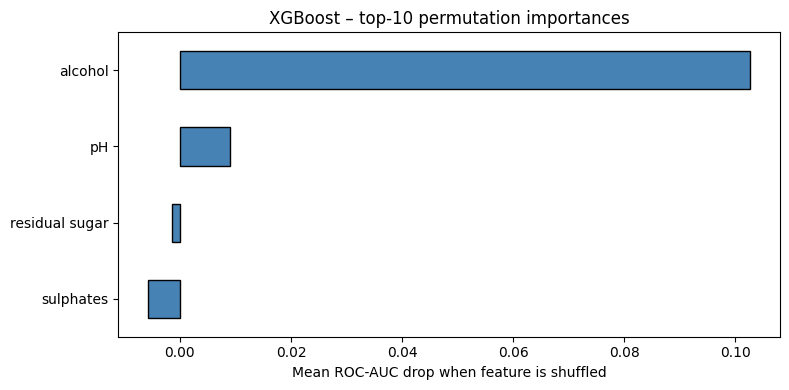

In [ ]:
gain_imp = (
    pd.Series(xgb_tuned.feature_importances_,  # gain-based importance
              index=X_traint.columns,           # keep correct feature names
              name="gain")
      .sort_values(ascending=False)
)

print("⮩  Native (gain) importances – top-10\n")
display(gain_imp.head(10).to_frame())

# -----------------------------------------------------
# 3.  Permutation importance on the *hold-out* test set
# -----------------------------------------------------
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    xgb_tuned,                # fitted model (pipeline or bare estimator)
    X_testt, y_testt,           # NEVER compute on training data
    n_repeats=40,             # more repeats → stabler estimates
    random_state=42,
    n_jobs=-1                 # use all CPU cores
)

perm_imp = (
    pd.Series(perm.importances_mean,
              index=X_testt.columns,
              name="perm_mean")
      .sort_values(ascending=False)
)

print("\n⮩  Permutation importances (mean ΔAUC) – top-10\n")
display(perm_imp.head(10).to_frame())

# -----------------------------------------------------
# 4.  Visualise permutation importances
# -----------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
(perm_imp.head(10).iloc[::-1]) \
    .plot(kind="barh", color="steelblue", edgecolor="k")
plt.xlabel("Mean ROC-AUC drop when feature is shuffled")
plt.title("XGBoost – top-10 permutation importances")
plt.tight_layout()
plt.show()


## **Modeling Summary & Considerations**

### **1. Data Preparation and Feature Transformation**

- The dataset contained skewed numeric variables, which were tested with **logarithmic transformations**.
- However, in models such as **SVM with RBF kernel**, log transformations did **not improve performance**, and in some cases led to degradation in AUC and F1 score.
- It was determined that **non-linear models** like SVM (with RBF) were **better able to capture relationships** in the raw feature space without requiring log normalization.

---

### **2. Why F1 Score Was Chosen**

- The target variable is **imbalanced**, with a much larger number of class `0` (low-quality wines) than class `1` (high-quality wines).
- Using **accuracy** as the primary metric would be misleading, as a model could achieve high accuracy by simply predicting the majority class.
- **F1 score** was selected because it provides a **balanced measure** between:
  - **Precision**: how many predicted high-quality wines are truly good.
  - **Recall**: how many truly high-quality wines were successfully identified.
- In this context, **F1 is ideal** because:
  - We care about **detecting good wines** (high recall),
  - But we also want to **minimize false positives** (maintain acceptable precision),
  - And the cost of missing a good wine or wrongly recommending a bad one both matter.

---

### **3. Model Performance Comparison**

| Model                        | AUC    | Accuracy | Recall | Precision | F1 Score | Comments                                |
|-----------------------------|--------|----------|--------|-----------|----------|-----------------------------------------|
| **SVM (Raw \| RBF)**        | 0.853  | 0.736    | 0.827  | 0.404     | **0.543** | Strongest overall balance. Highest F1.  |
| Logistic Regression (Core-8)| 0.811  | **0.749**| 0.743  | **0.743** | 0.529     | High confidence, lower coverage.        |
| Logistic Regression (Trimmed)| 0.807 | 0.736    | 0.757  | **0.757** | 0.521     | Simplified model with solid performance.|
| XGBoost (tuned)             | —      | 0.617    | **0.871** | 0.315   | 0.463     | Most aggressive; high recall, low precision. |

---

### **4. Challenges Identified**

- **Class imbalance**: The dataset is dominated by a majority class (class = 0), resulting in potential bias toward negative predictions.
  - Models like XGBoost and SVM were tuned using `scale_pos_weight` or `class_weight='balanced'` to mitigate this.
- **Small sample size**: Some models (especially tree-based) may have been affected by **limited training data**, increasing variance and reducing generalizability.
- **Multicollinearity**: Several features were found to be highly correlated.
  - **Variance Inflation Factor (VIF)** and **p-values** from logistic regression were used to identify and remove variables exhibiting high multicollinearity, reducing model redundancy and improving stability.

---

### **5. Conclusion**

- **SVM with RBF kernel** on raw features outperformed other configurations, especially when recall and F1 score were prioritized.
- While feature engineering (e.g., log transformation) and variable selection techniques helped improve linear models, non-linear models like SVM inherently handled complexity without additional transformations.


In [3]:
!jupyter nbconvert --to html "/content/drive/MyDrive/courseramachine/WineClassification.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/courseramachine/WineClassification.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 29 image(s).
[NbConvertApp] Writing 2121642 bytes to /content/drive/MyDrive/courseramachine/WineClassification.html
